In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-adaptability-level-in-online-education/students_adaptability_level_online_education.csv


In [3]:
df_st = pd.read_csv(os.path.join(dirname, filenames[0]))
df_st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


In [4]:
df_st.isnull().sum()

Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64

In [5]:
df_st.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


In [6]:
unique_counts = df_st.nunique()

print(unique_counts)

Gender                 2
Age                    6
Education Level        3
Institution Type       2
IT Student             2
Location               2
Load-shedding          2
Financial Condition    3
Internet Type          2
Network Type           3
Class Duration         3
Self Lms               2
Device                 3
Adaptivity Level       3
dtype: int64


In [12]:
for column in df_st:
        print("Column"," ",column,"  uniquevalue are :", df_st[column].nunique())
        print(df_st[column].unique())
        print("------------------------------------------------------------------") 

Column   Gender   uniquevalue are : 2
['Boy' 'Girl']
------------------------------------------------------------------
Column   Age   uniquevalue are : 6
['21-25' '16-20' '11-15' '26-30' '6-10' '1-5']
------------------------------------------------------------------
Column   Education Level   uniquevalue are : 3
['University' 'College' 'School']
------------------------------------------------------------------
Column   Institution Type   uniquevalue are : 2
['Non Government' 'Government']
------------------------------------------------------------------
Column   IT Student   uniquevalue are : 2
['No' 'Yes']
------------------------------------------------------------------
Column   Location   uniquevalue are : 2
['Yes' 'No']
------------------------------------------------------------------
Column   Load-shedding   uniquevalue are : 2
['Low' 'High']
------------------------------------------------------------------
Column   Financial Condition   uniquevalue are : 3
['Mid' 'Poor' 'R

In [13]:
df_st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


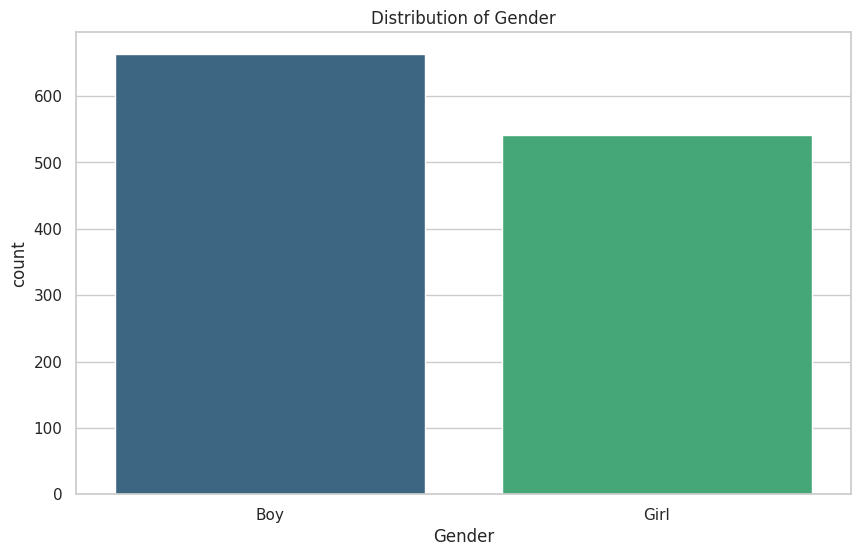

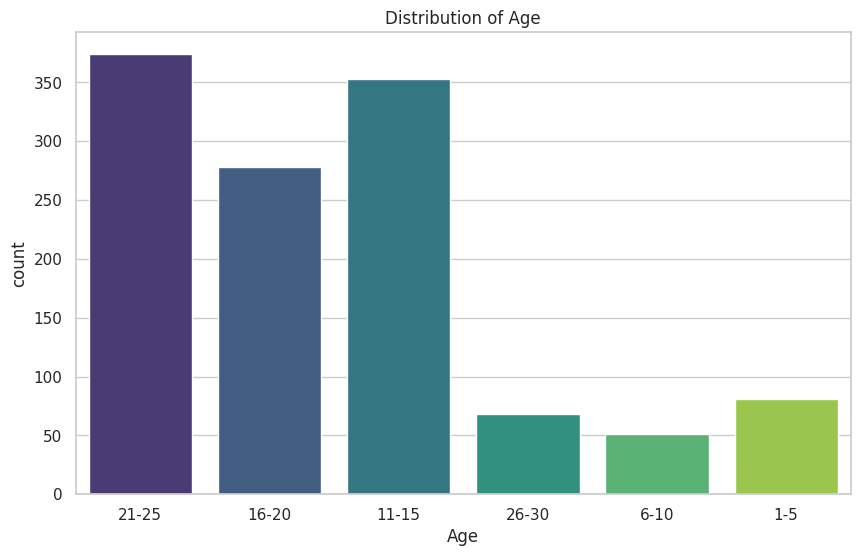

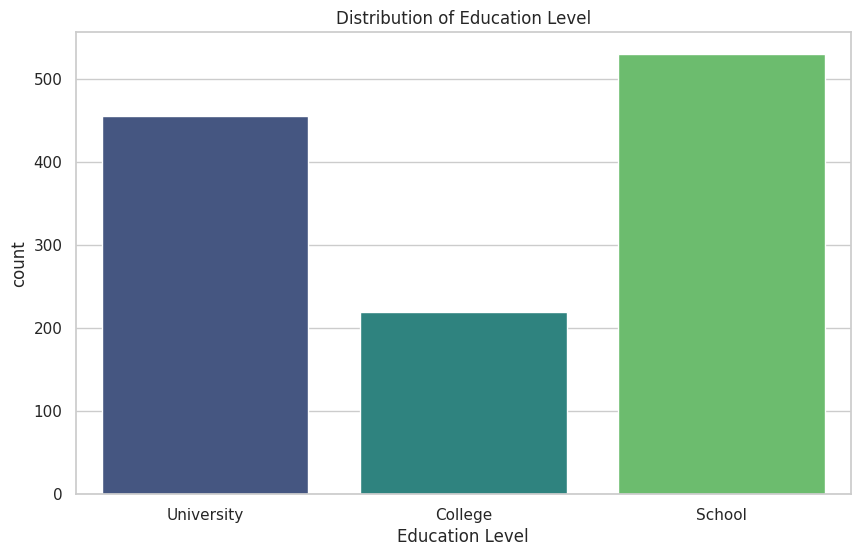

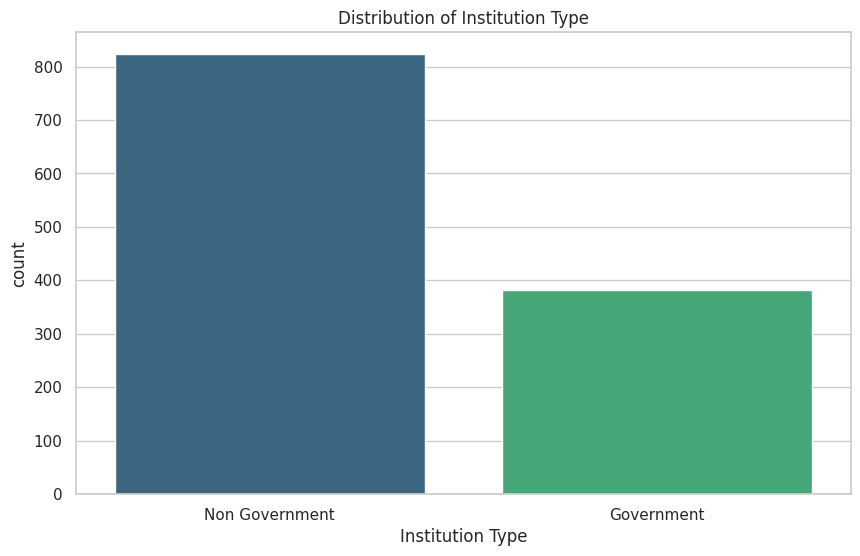

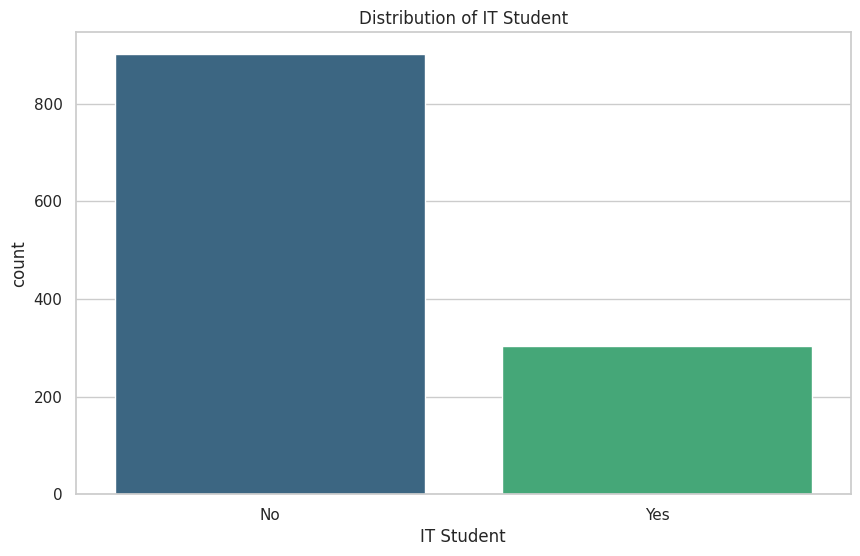

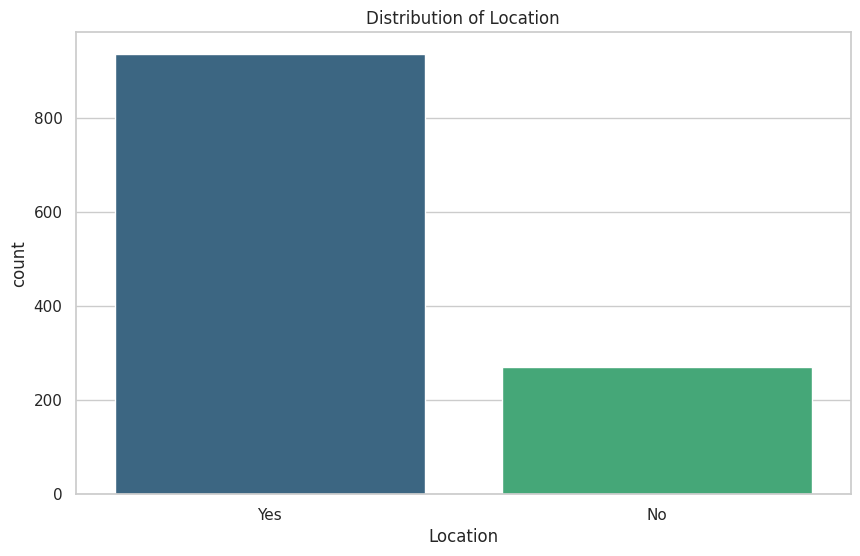

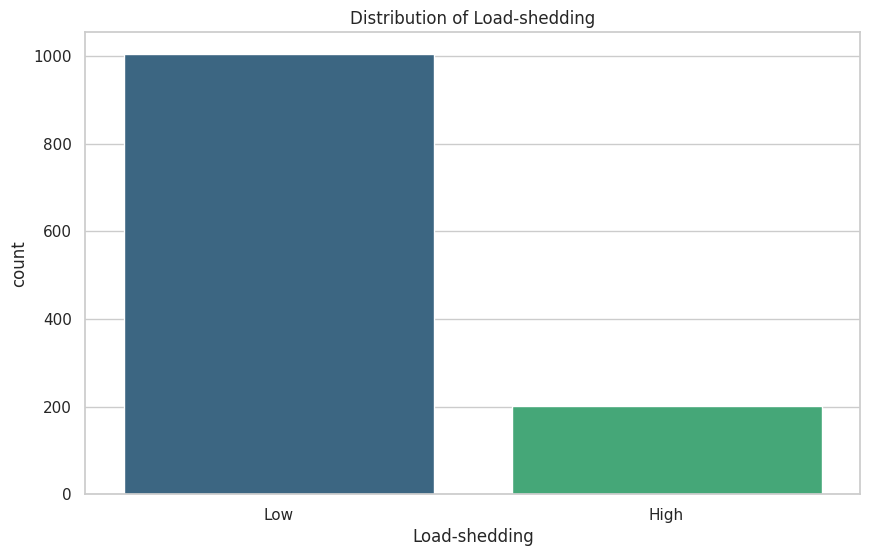

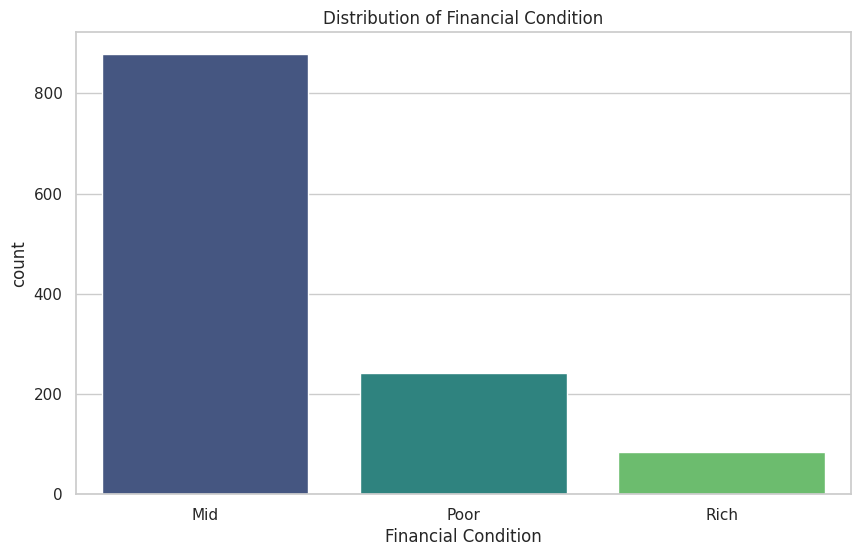

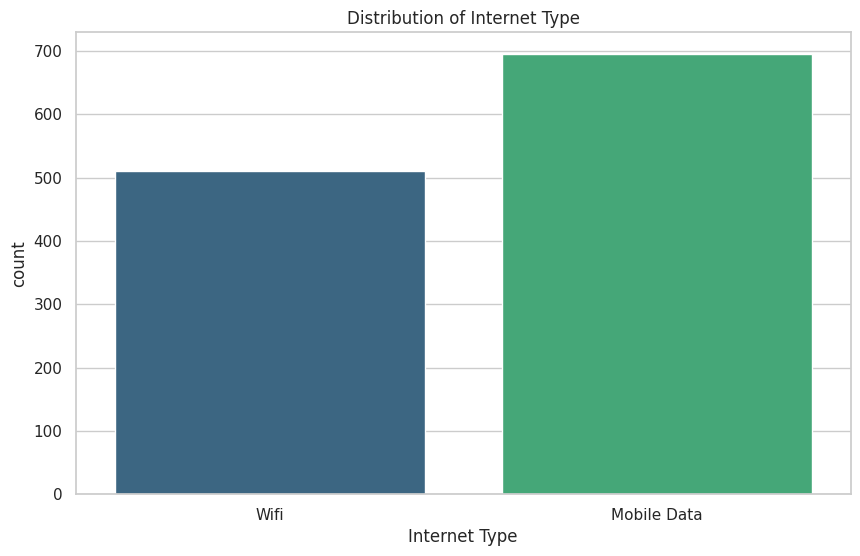

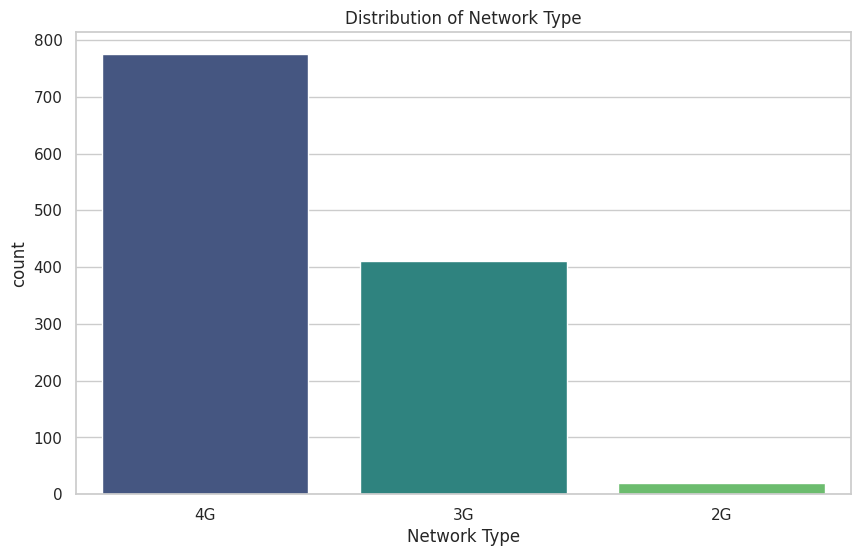

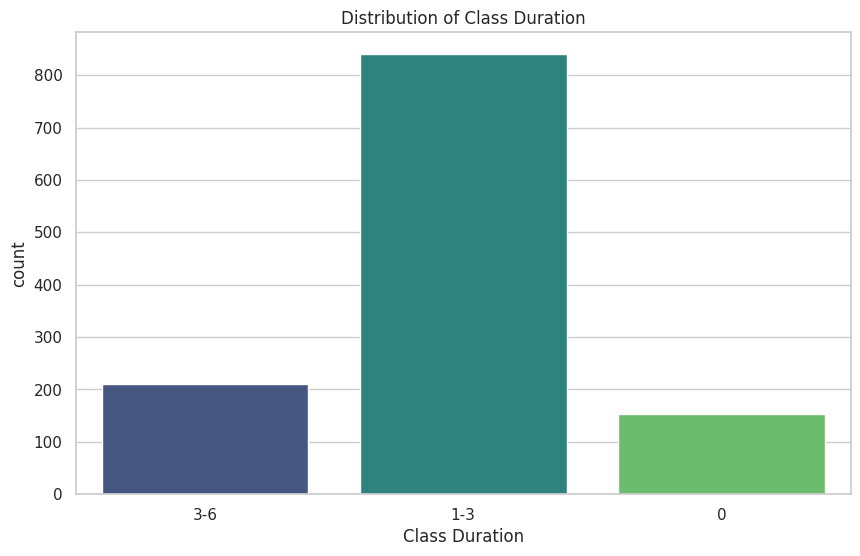

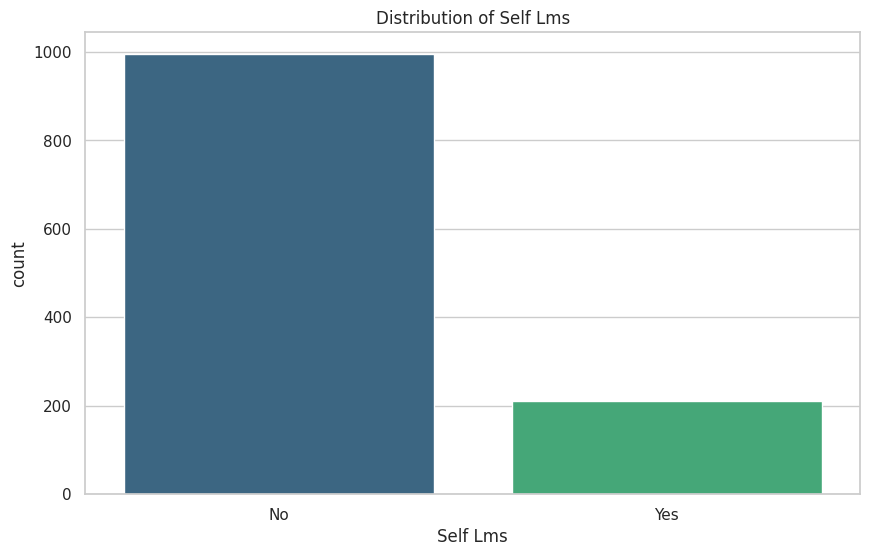

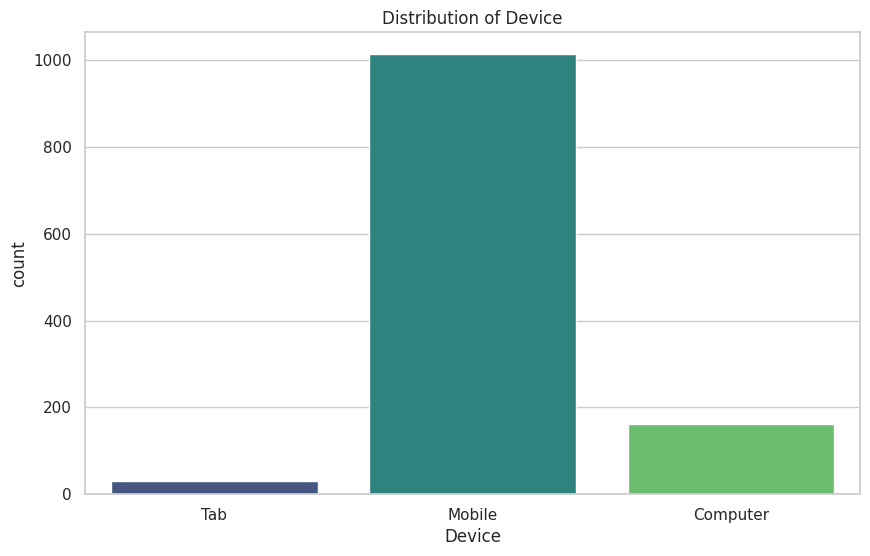

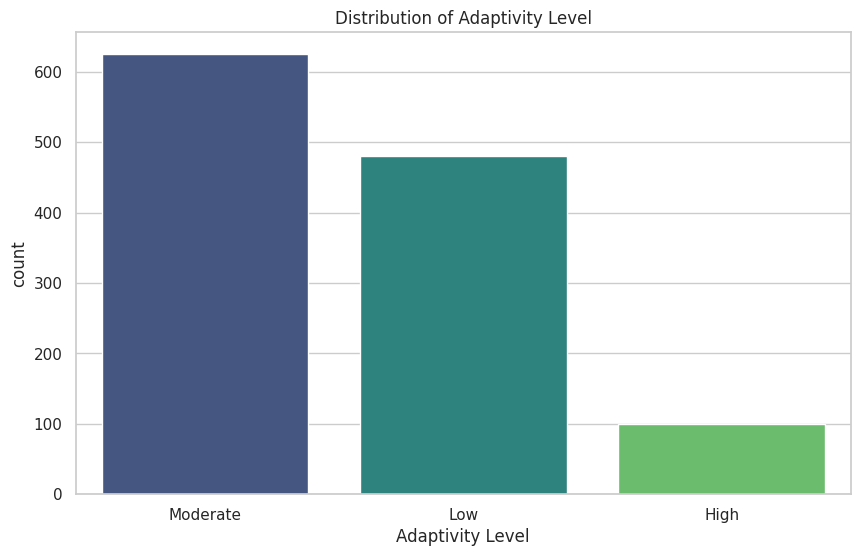

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for Seaborn plots
sns.set(style="whitegrid")

# Plotting bar plots for each categorical column
for column in df_st.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=df_st, palette="viridis")
    plt.title(f'Distribution of {column}')
    plt.show()


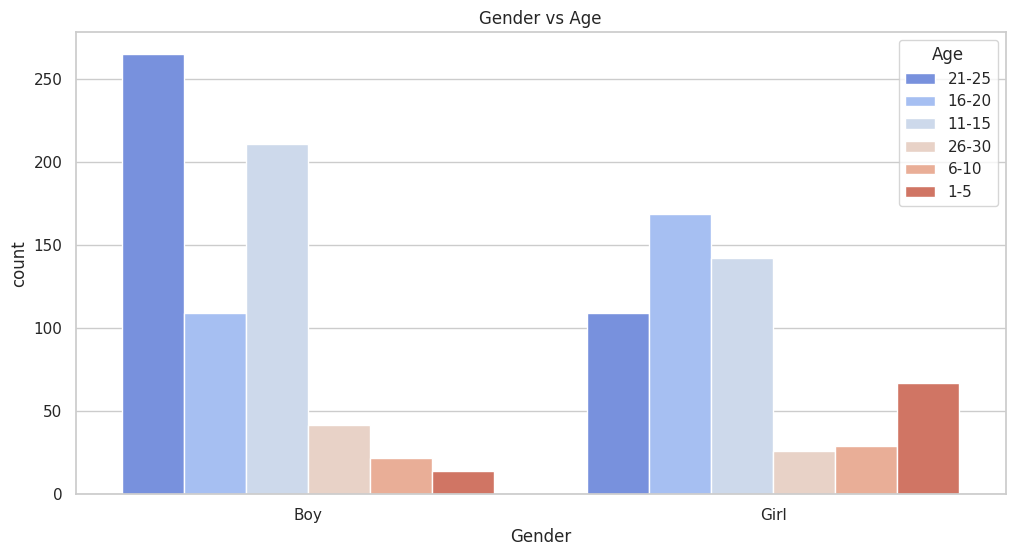

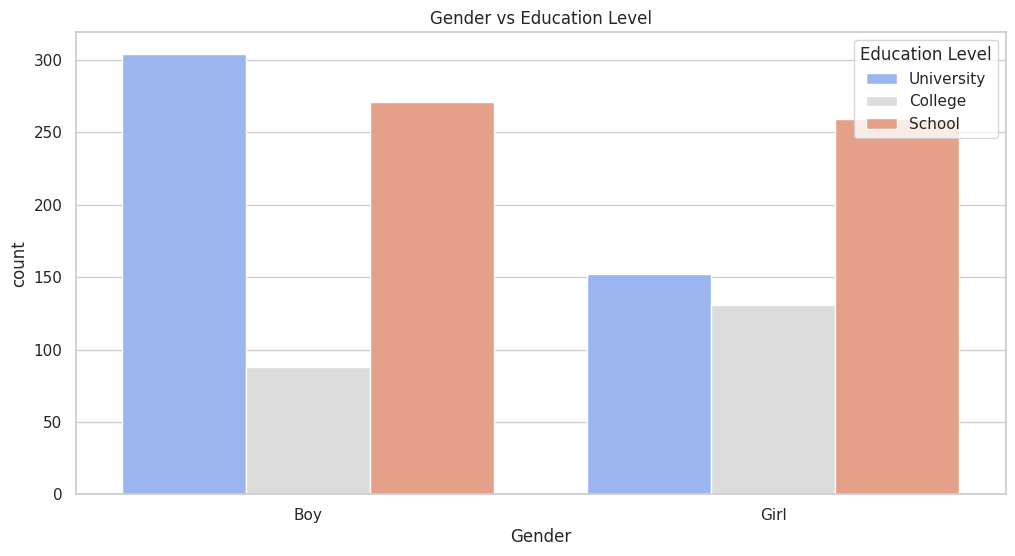

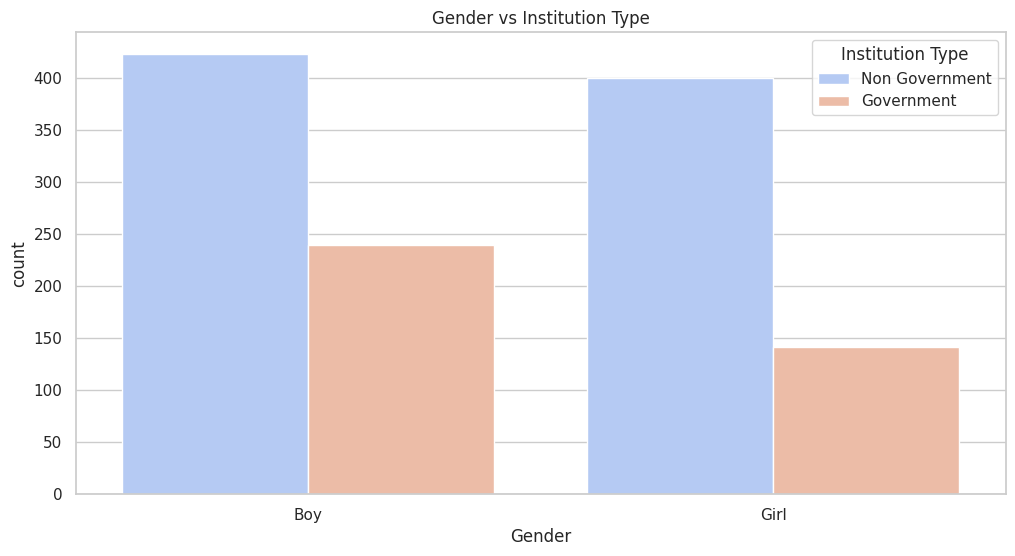

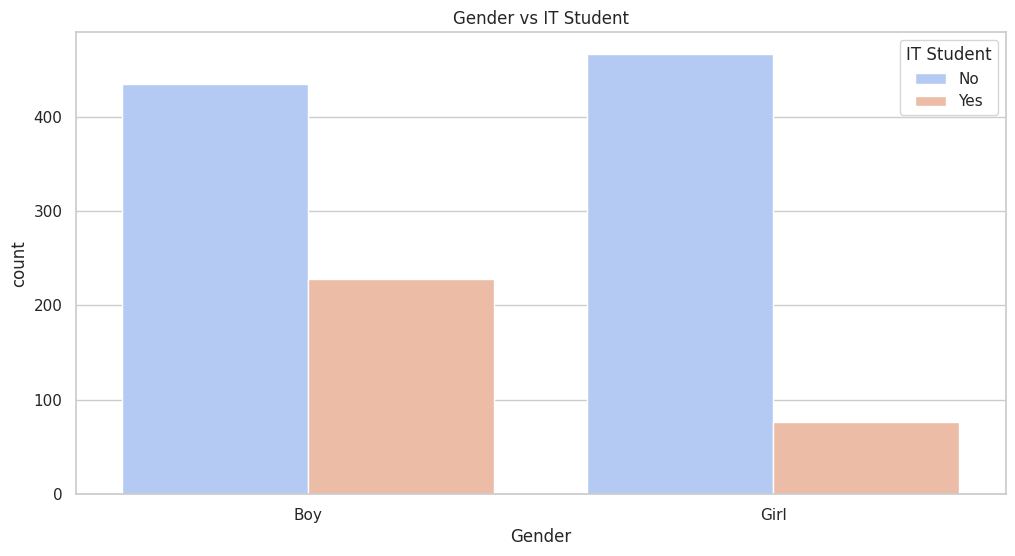

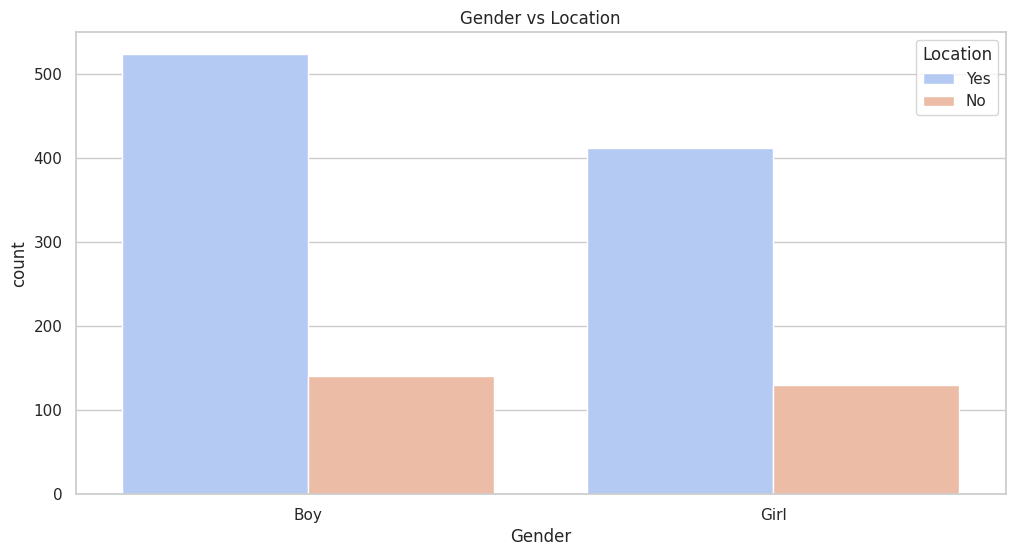

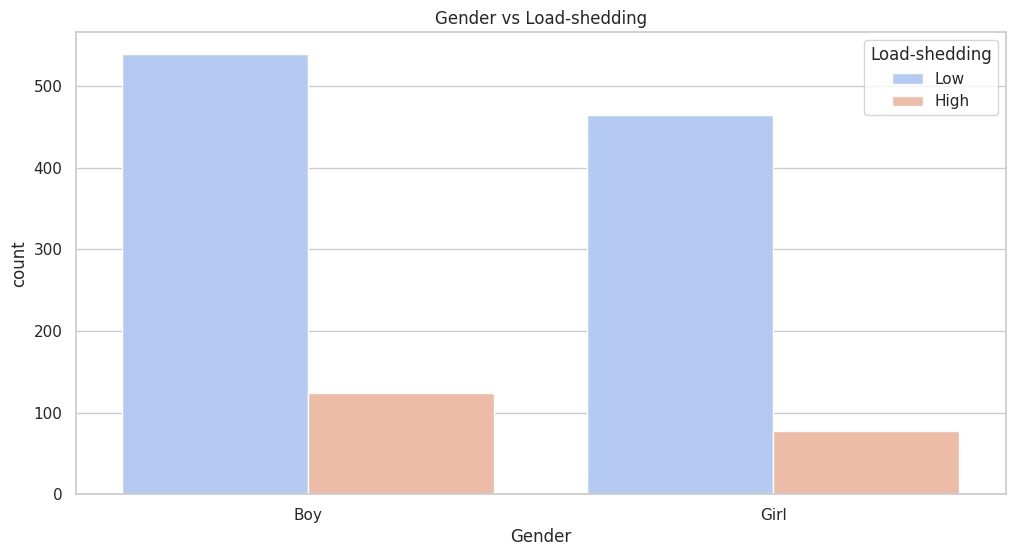

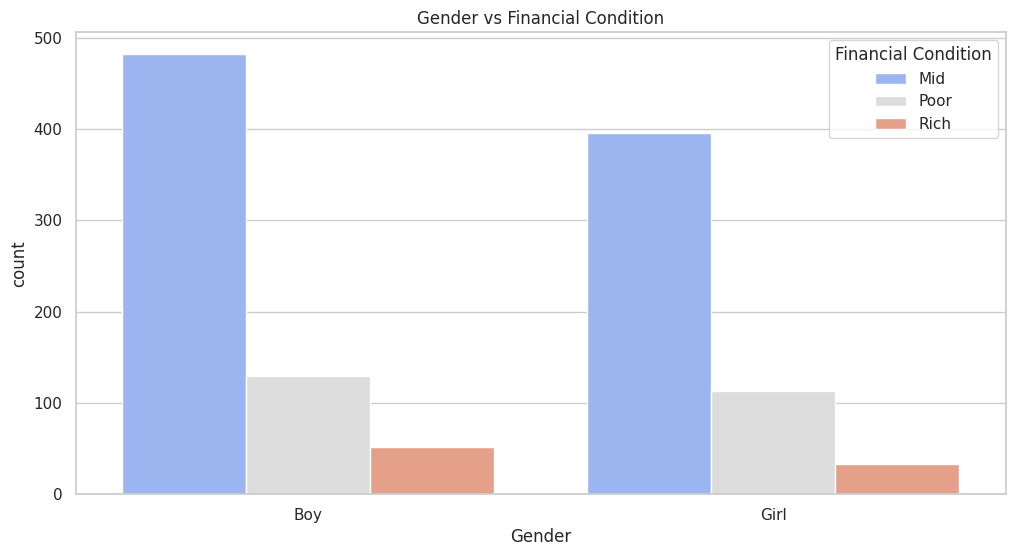

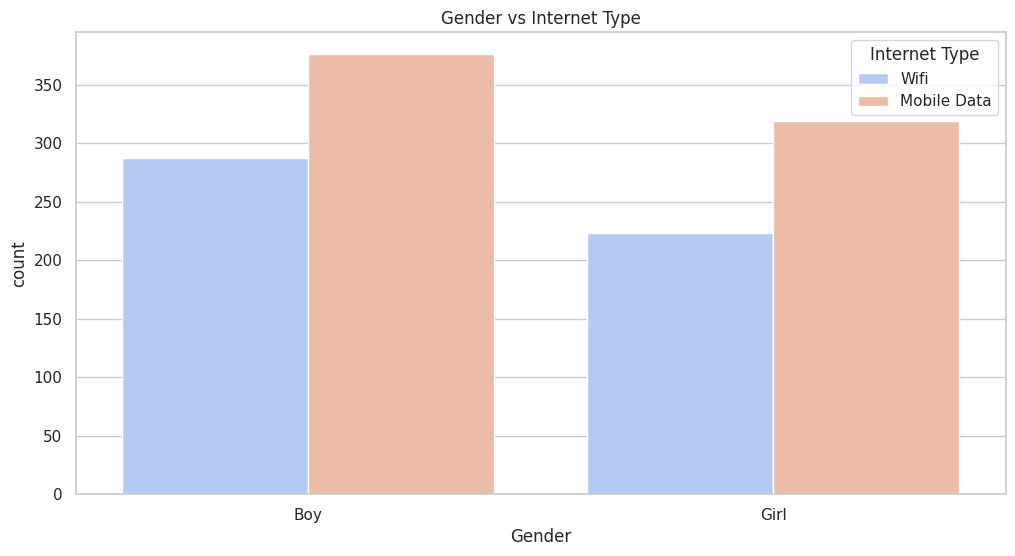

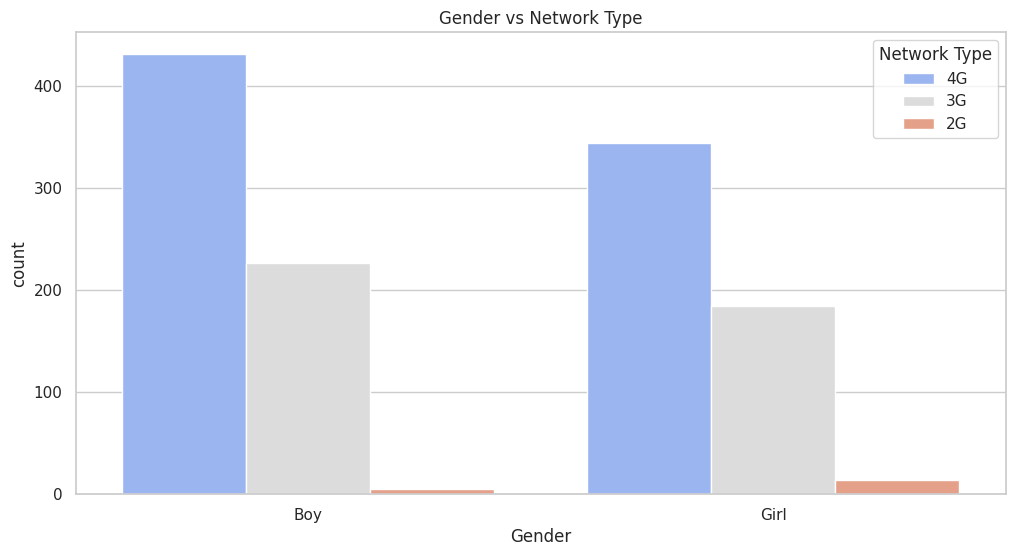

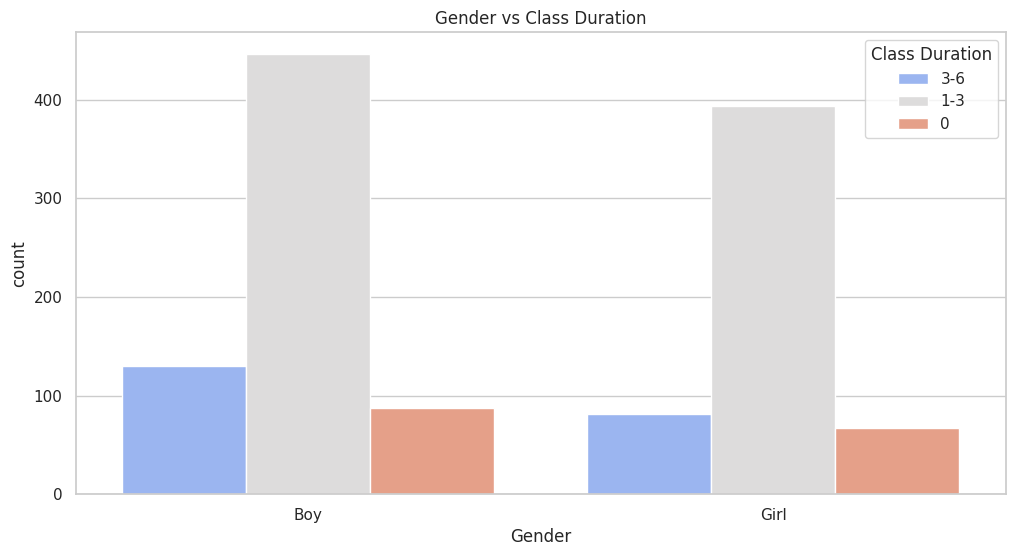

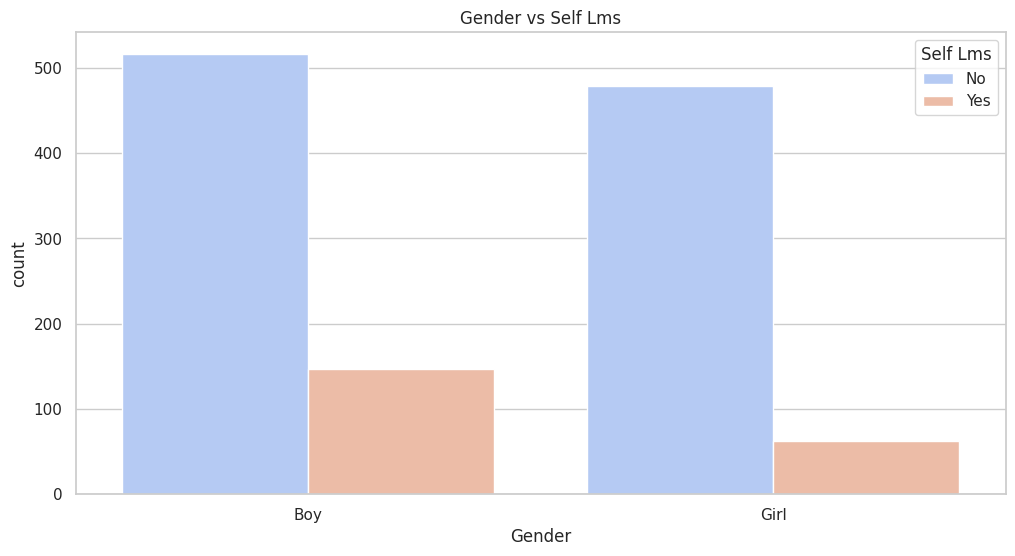

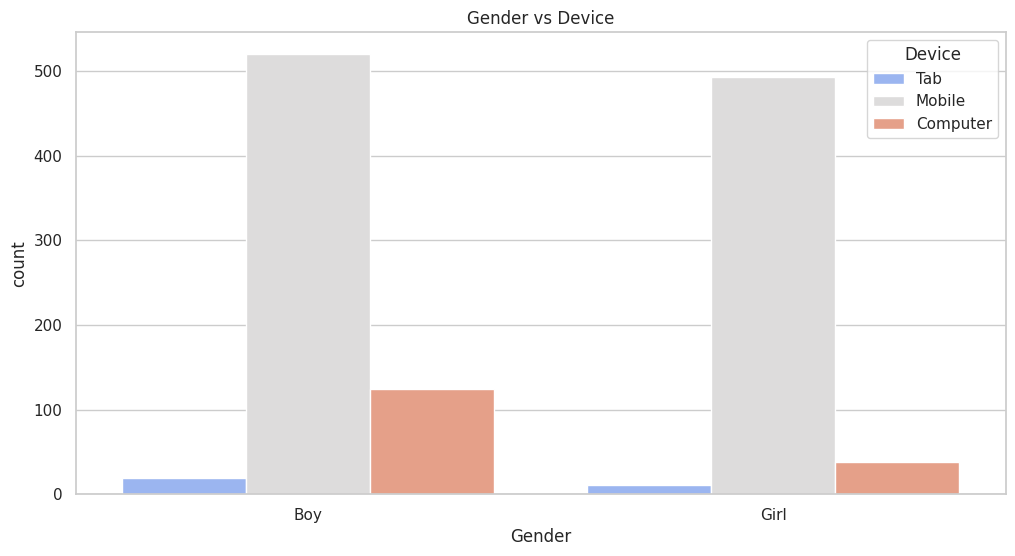

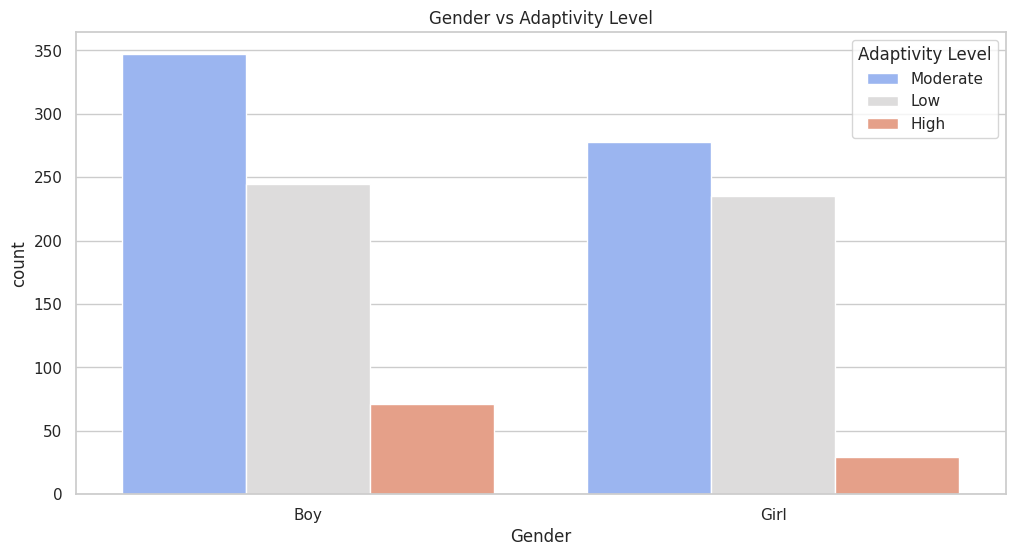

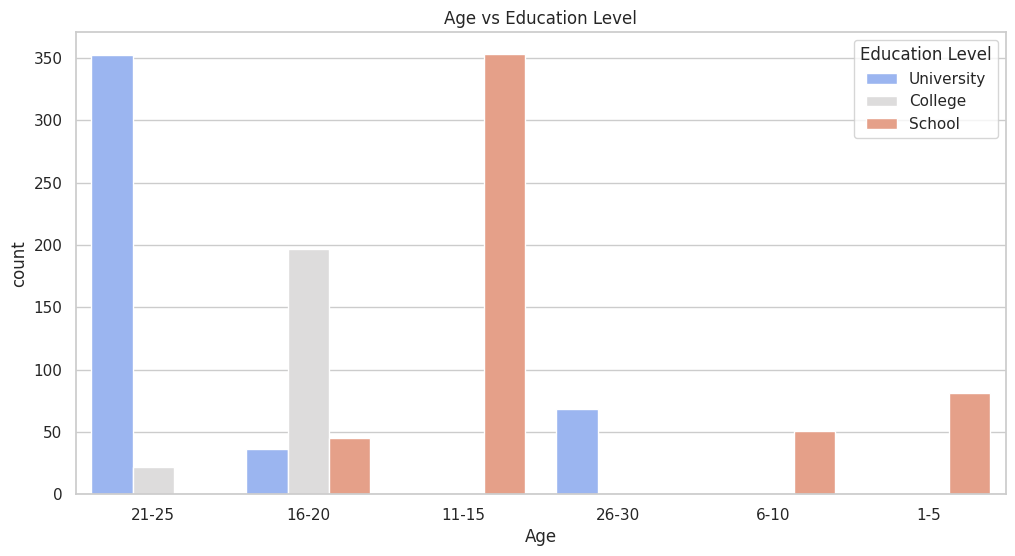

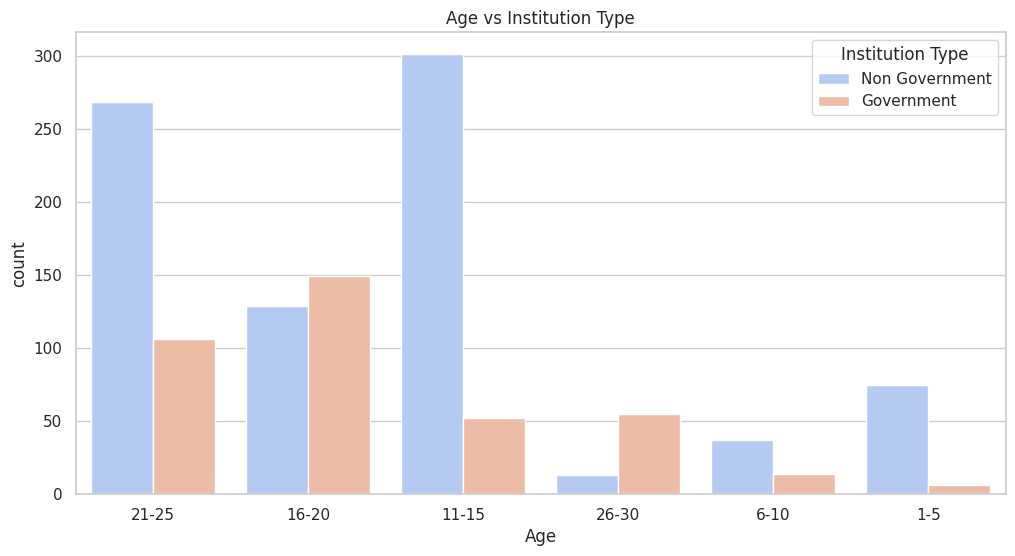

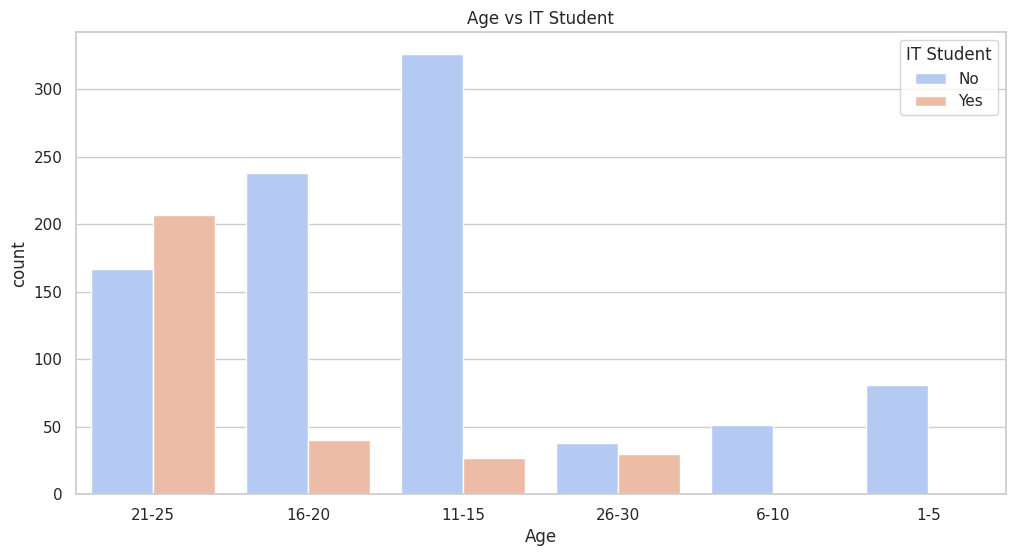

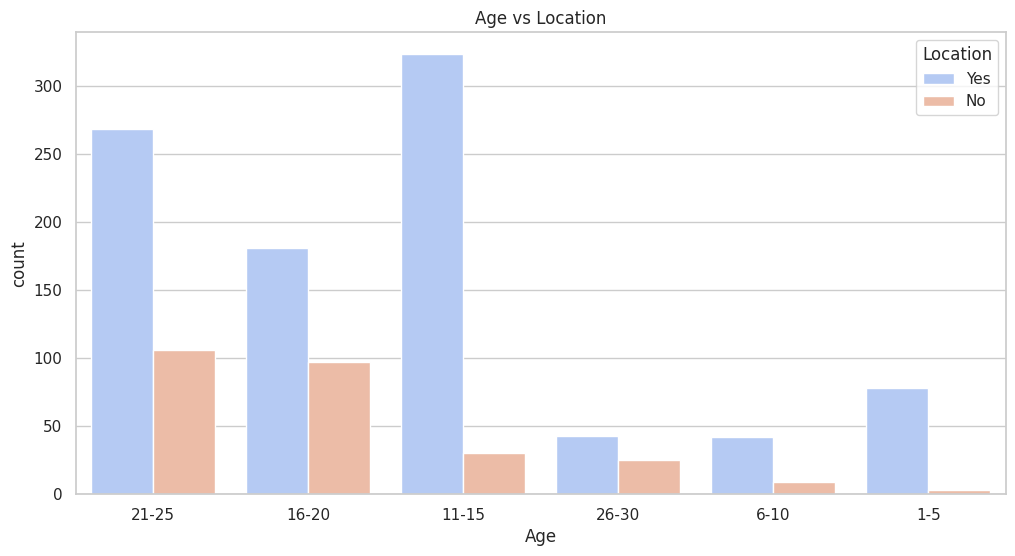

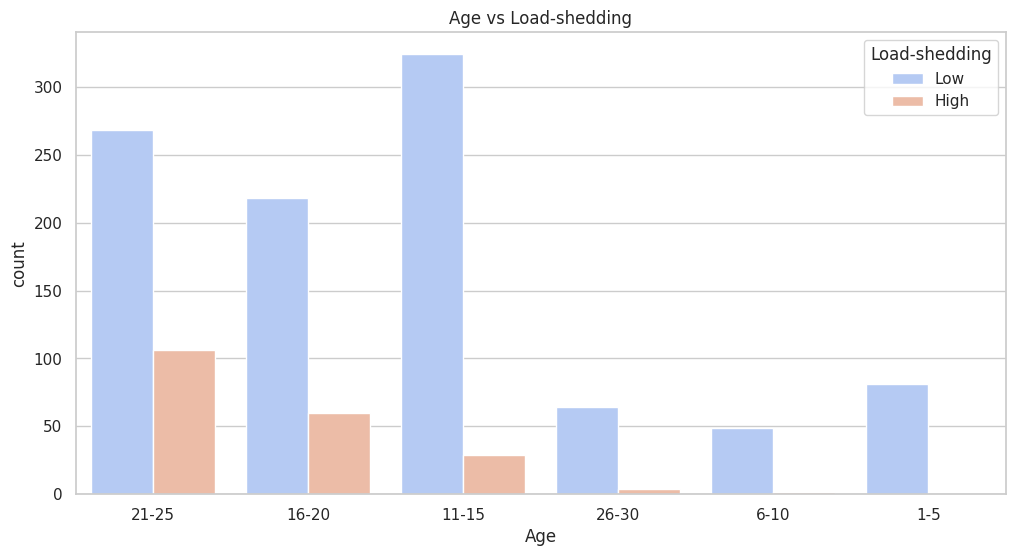

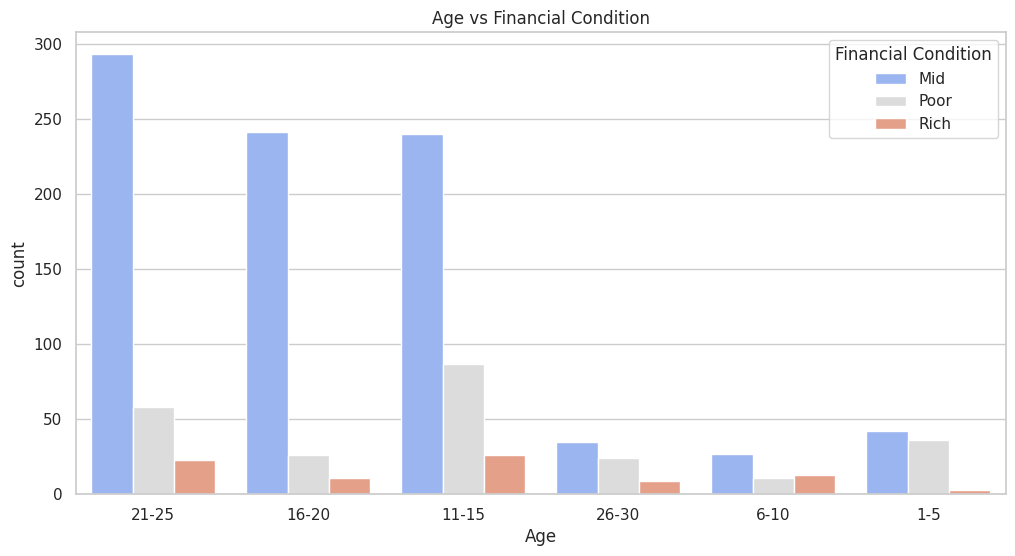

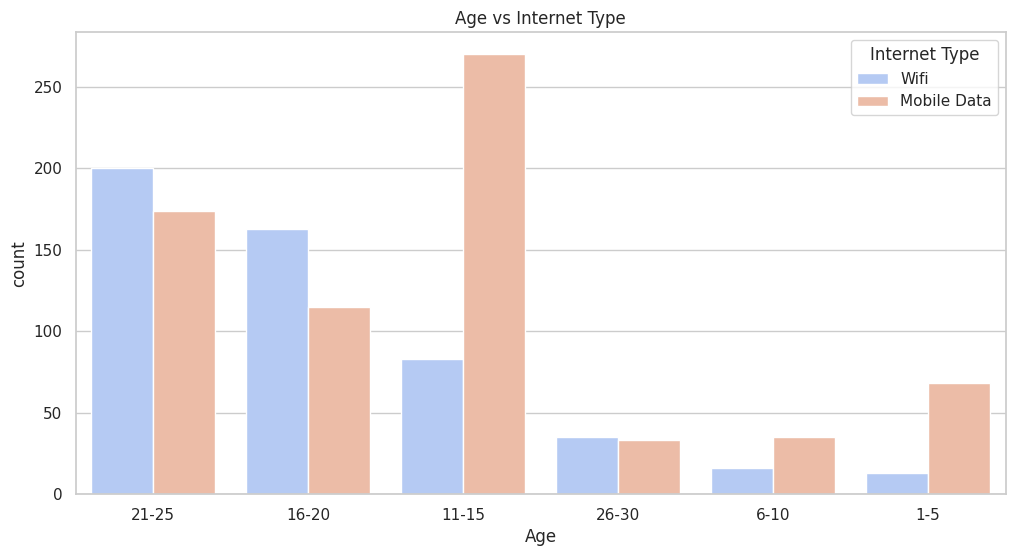

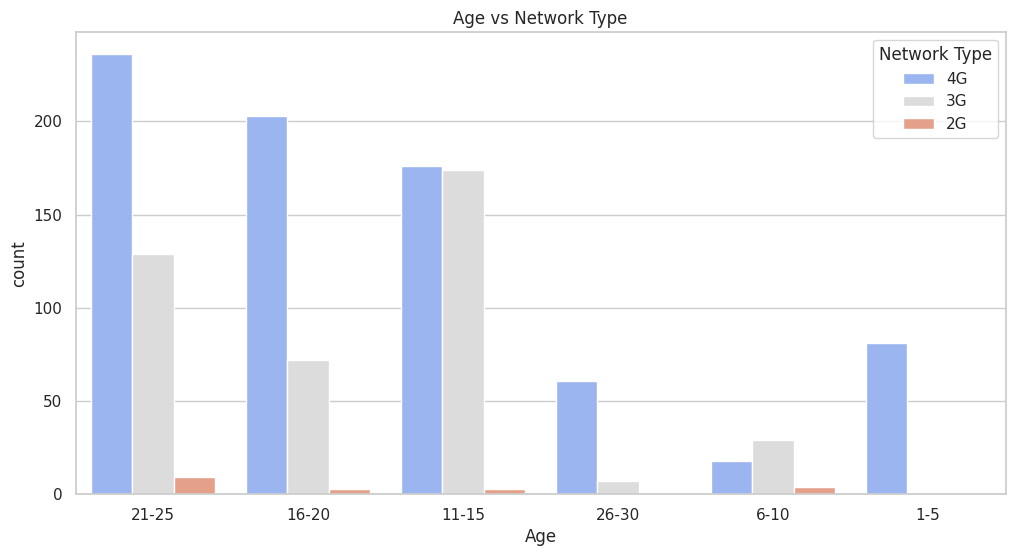

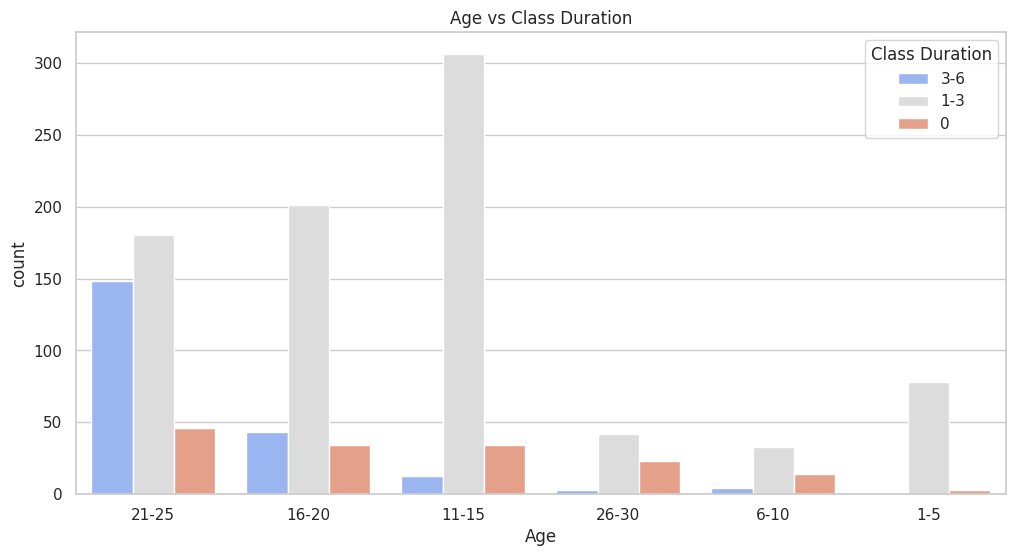

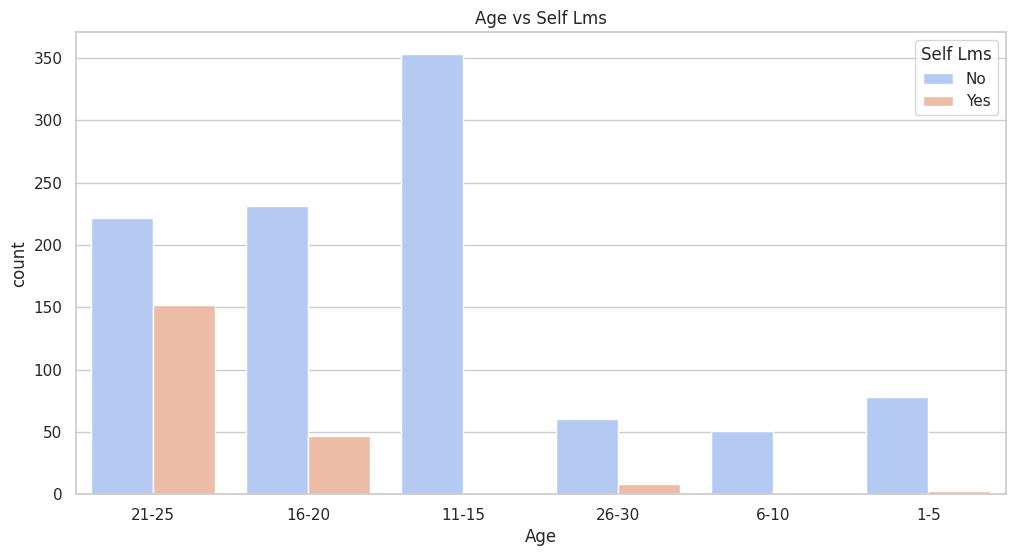

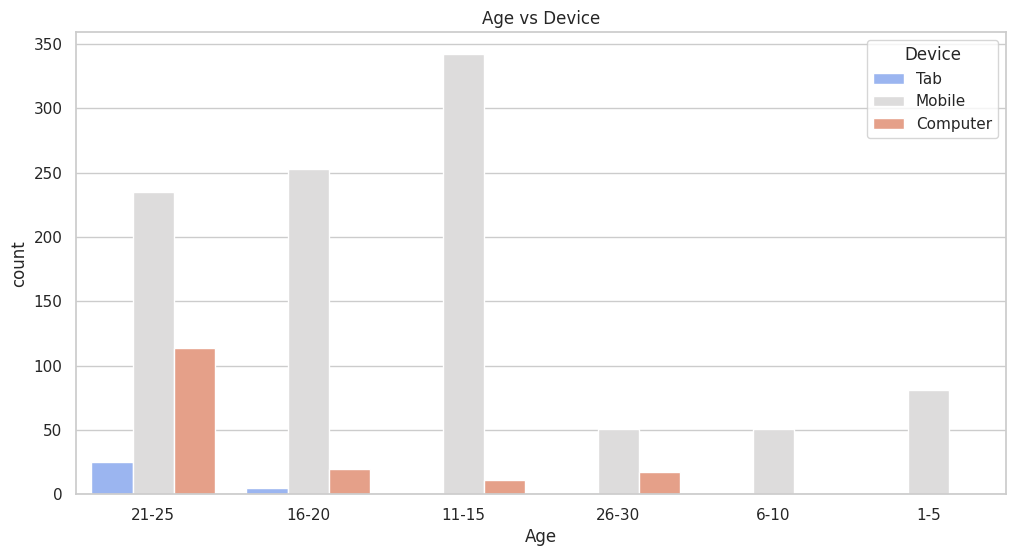

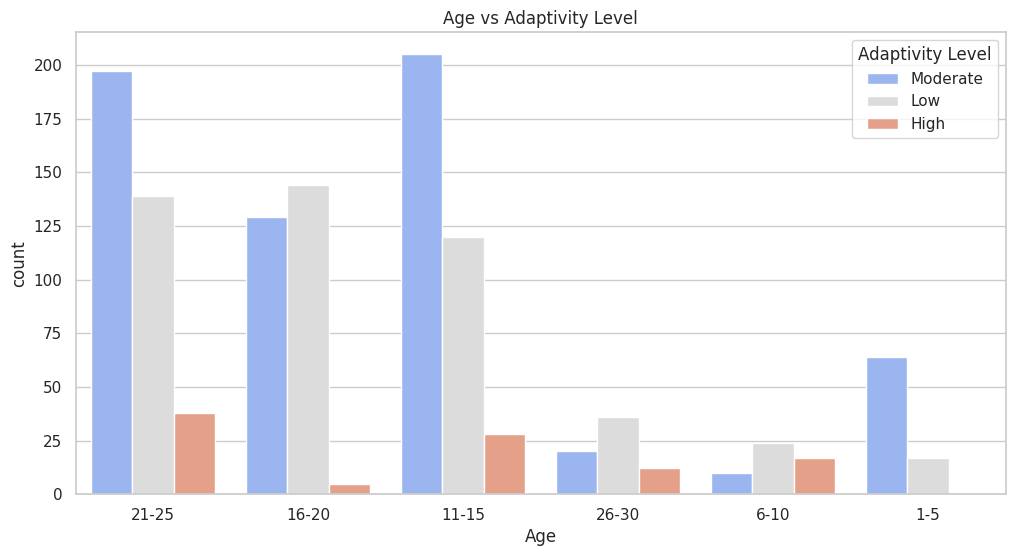

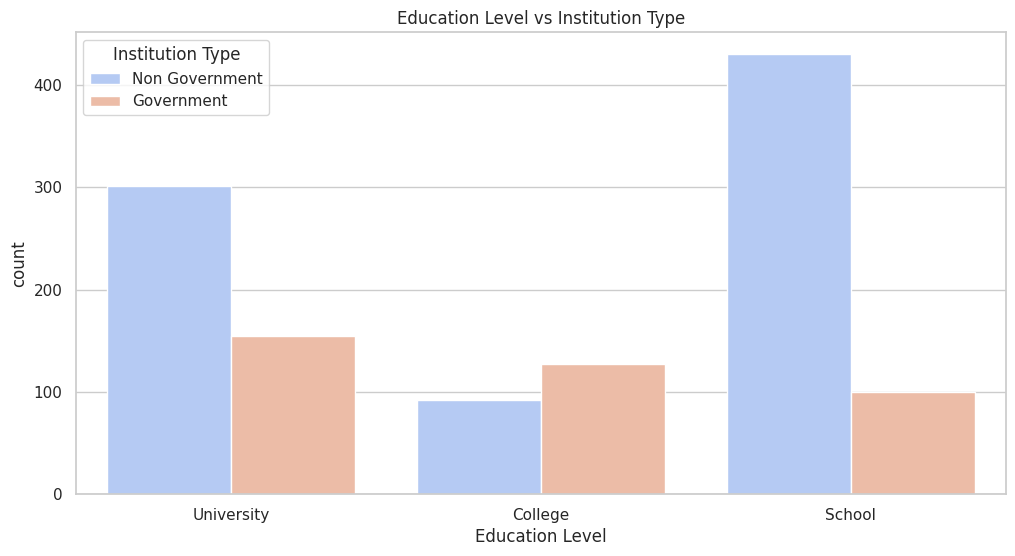

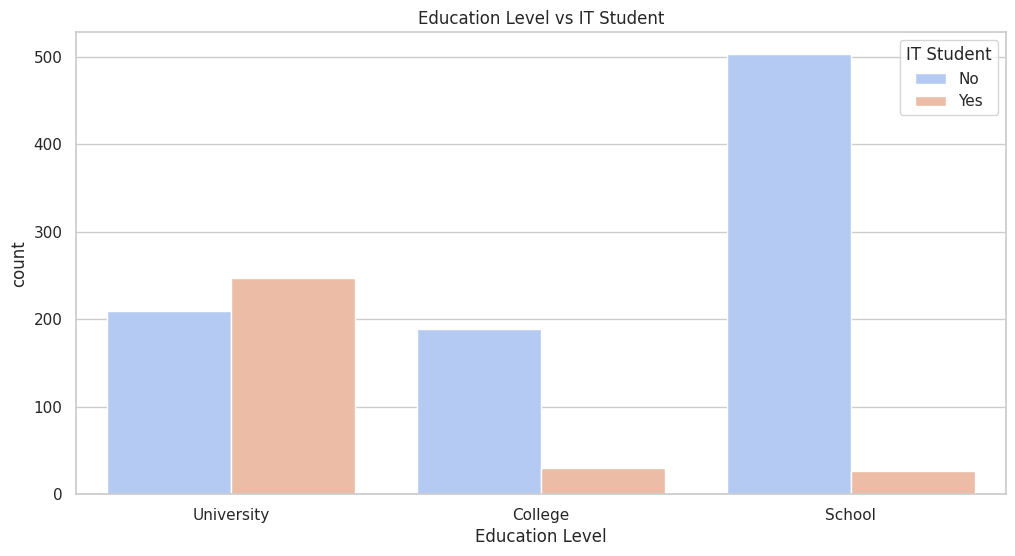

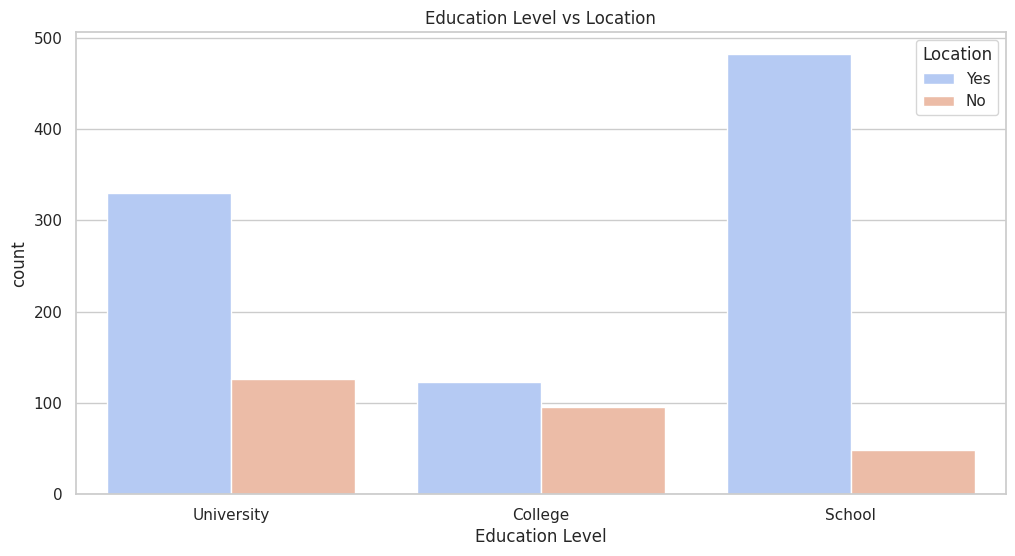

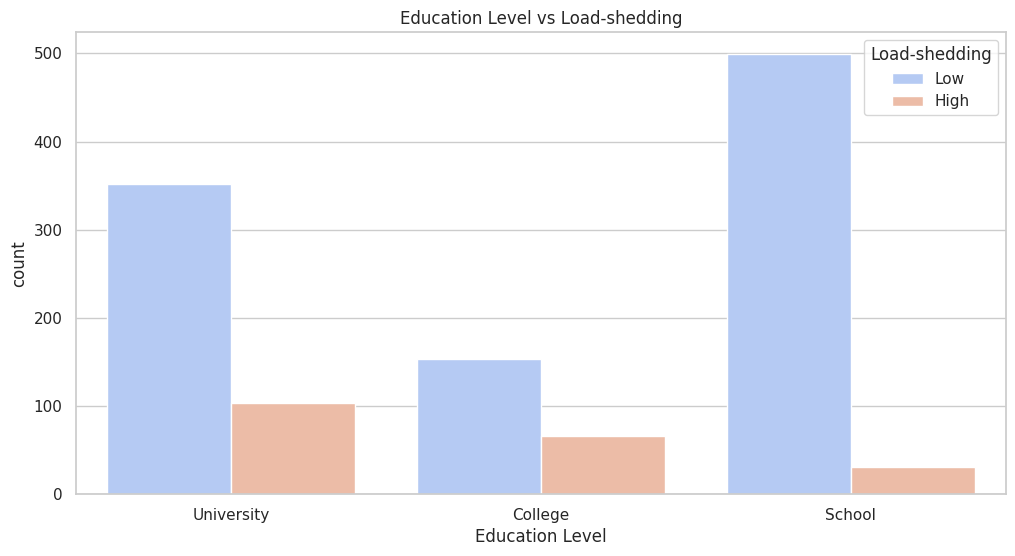

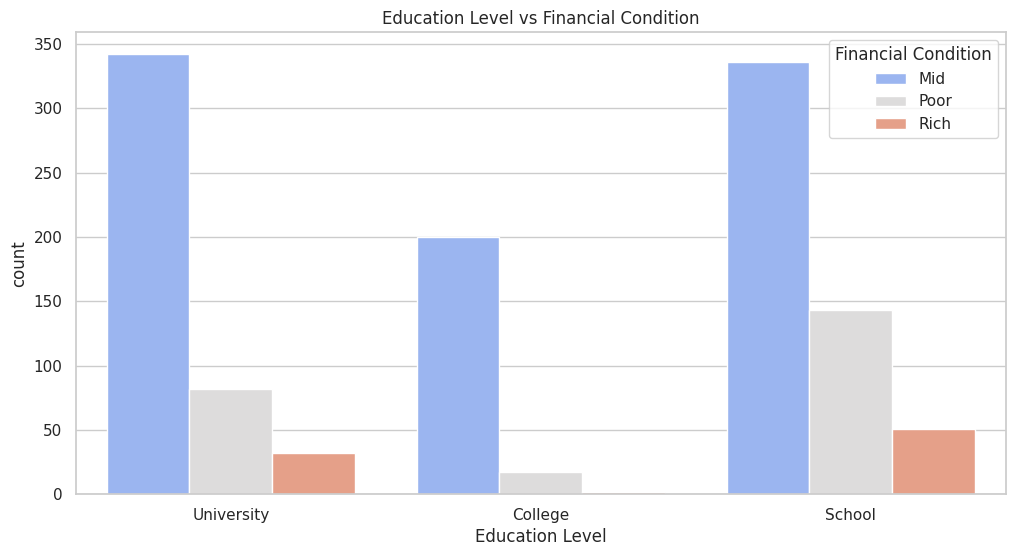

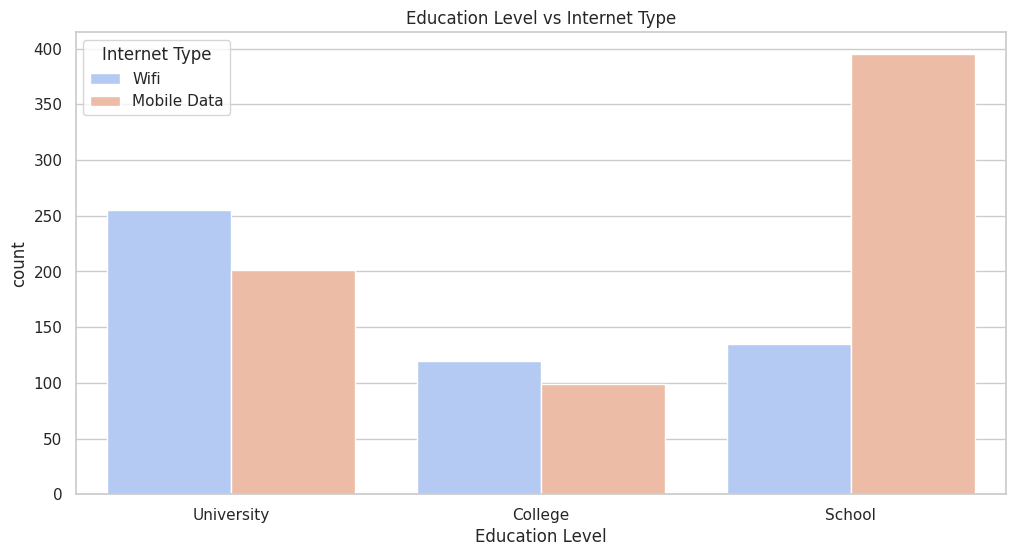

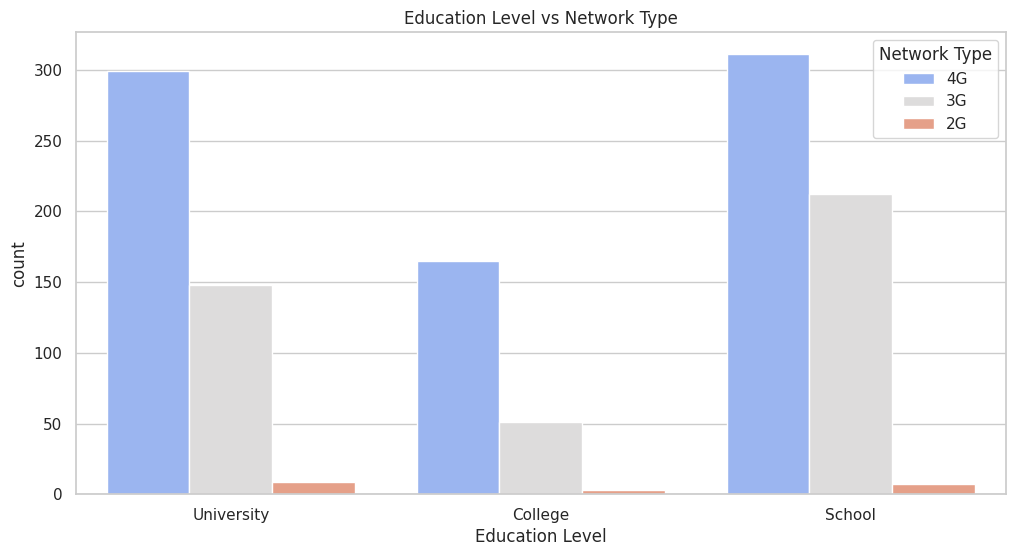

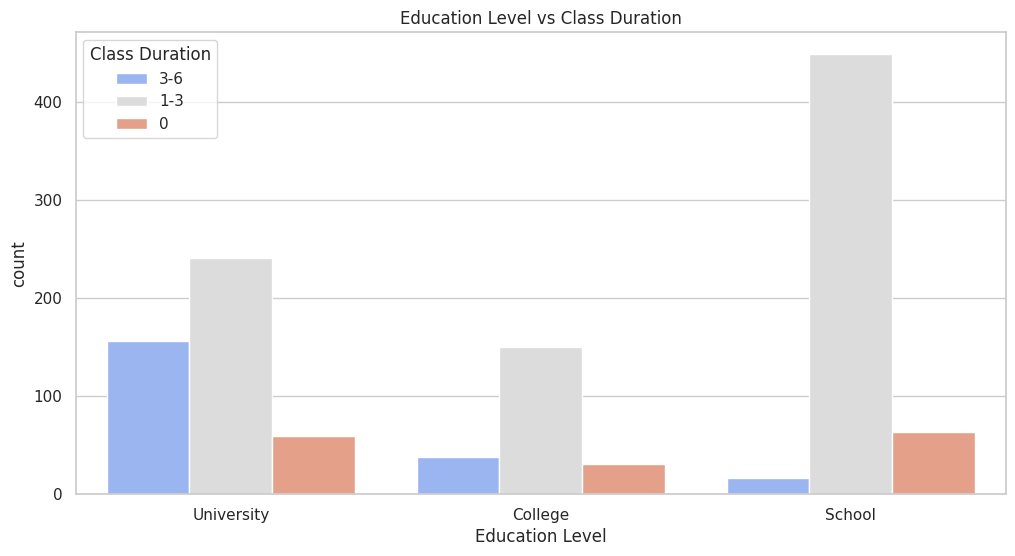

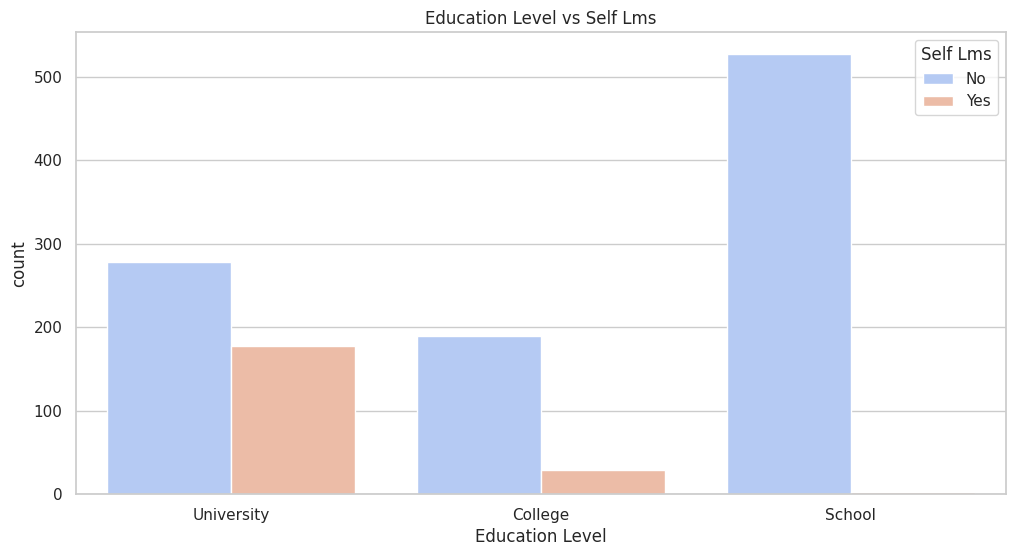

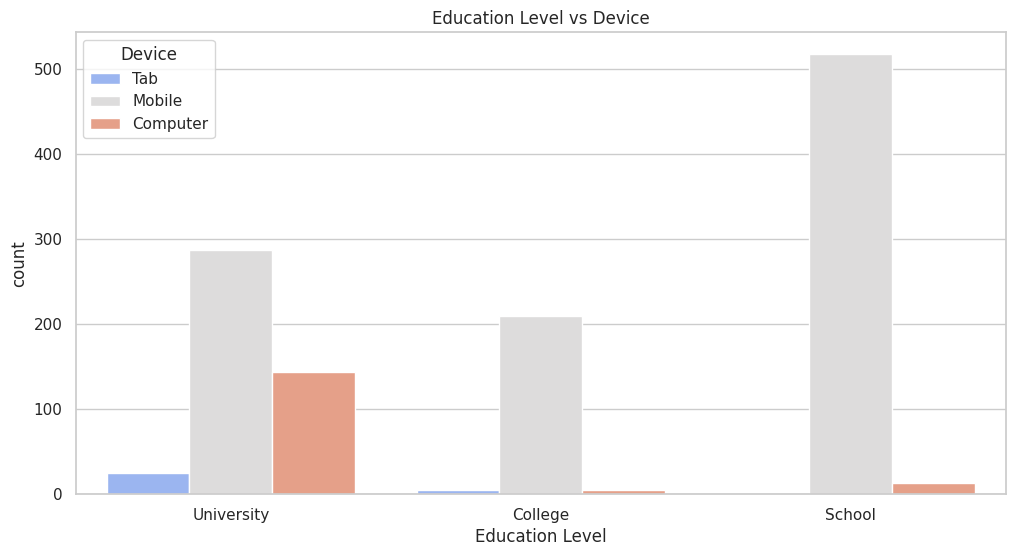

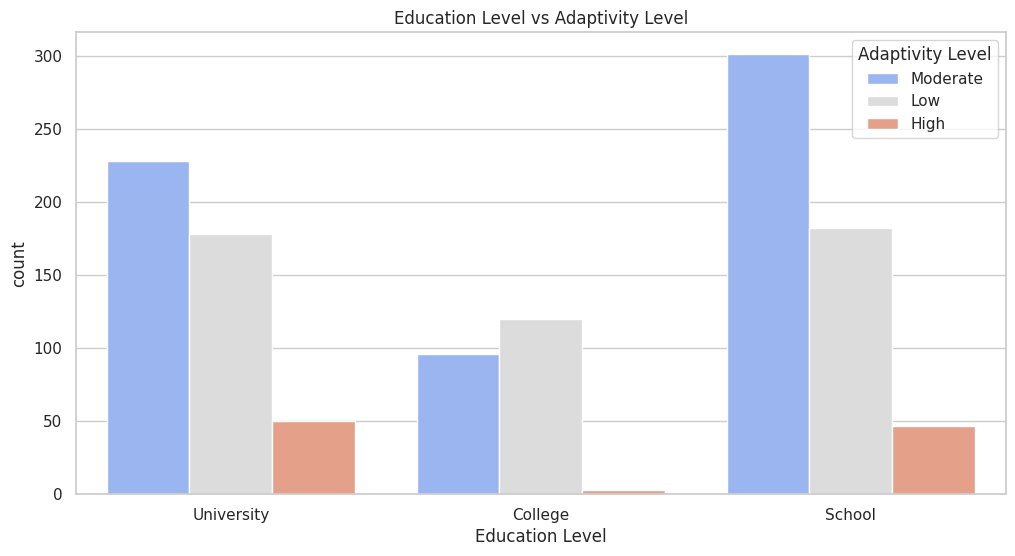

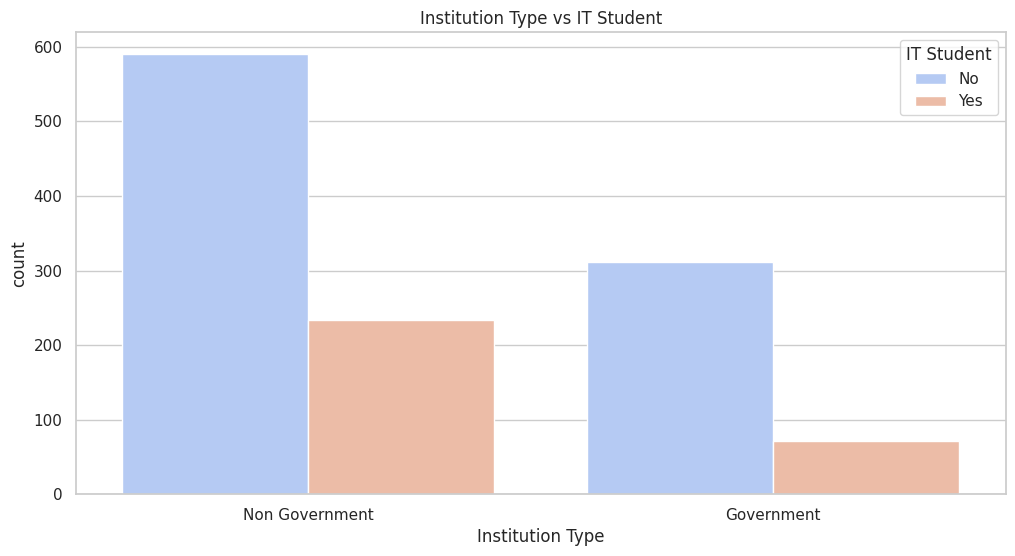

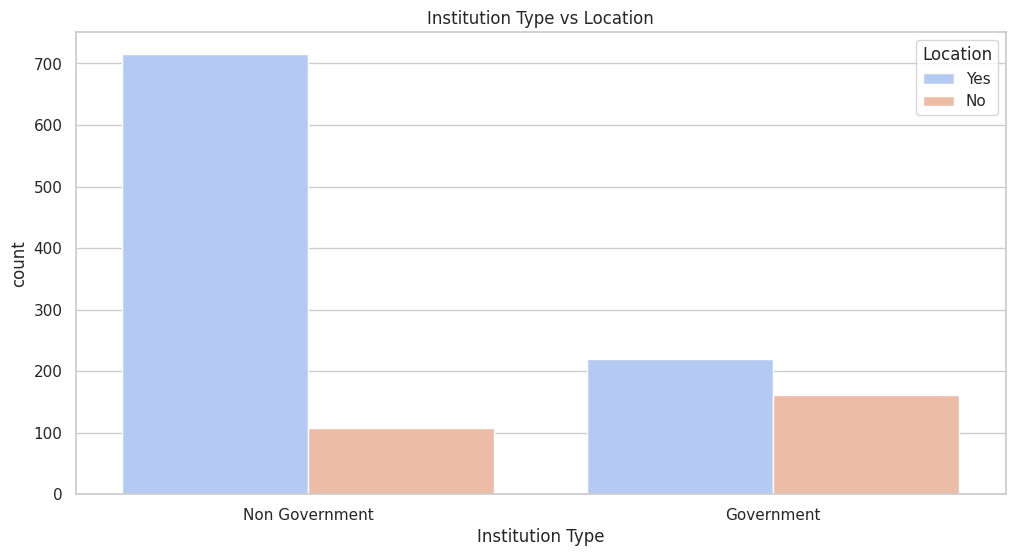

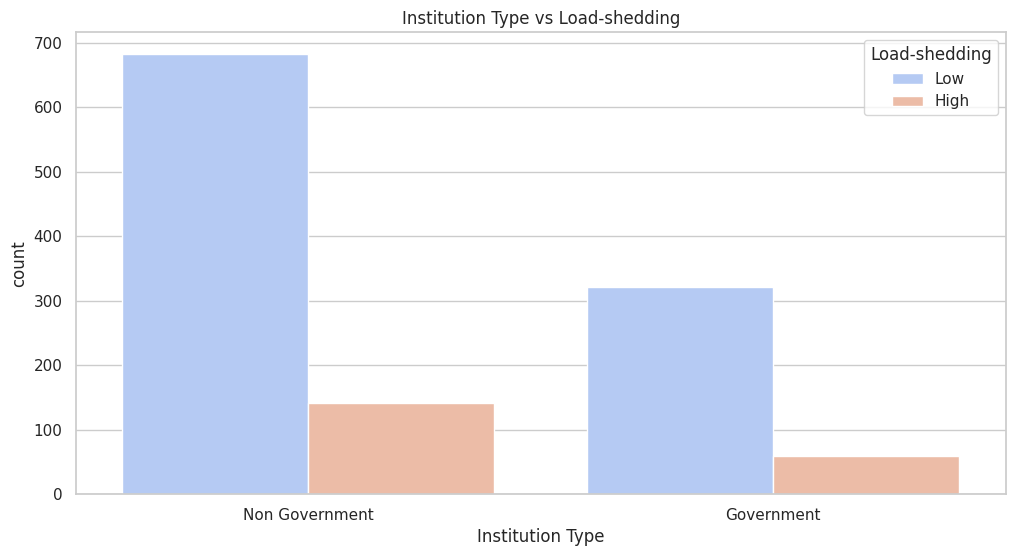

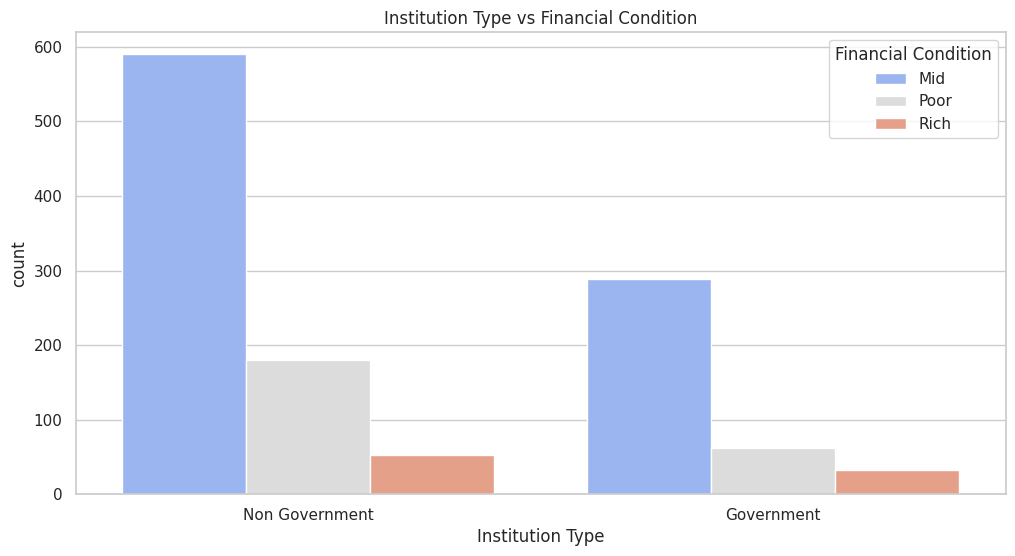

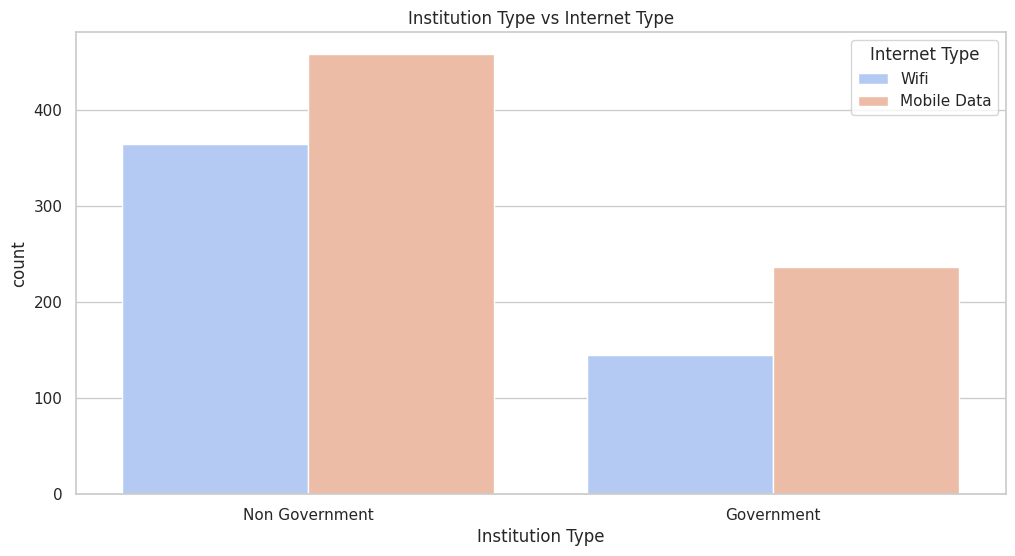

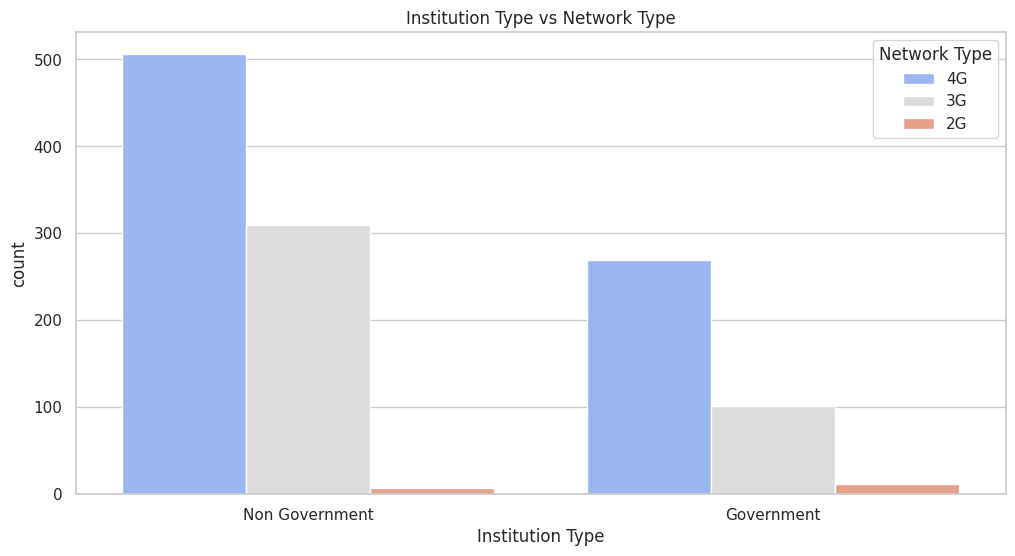

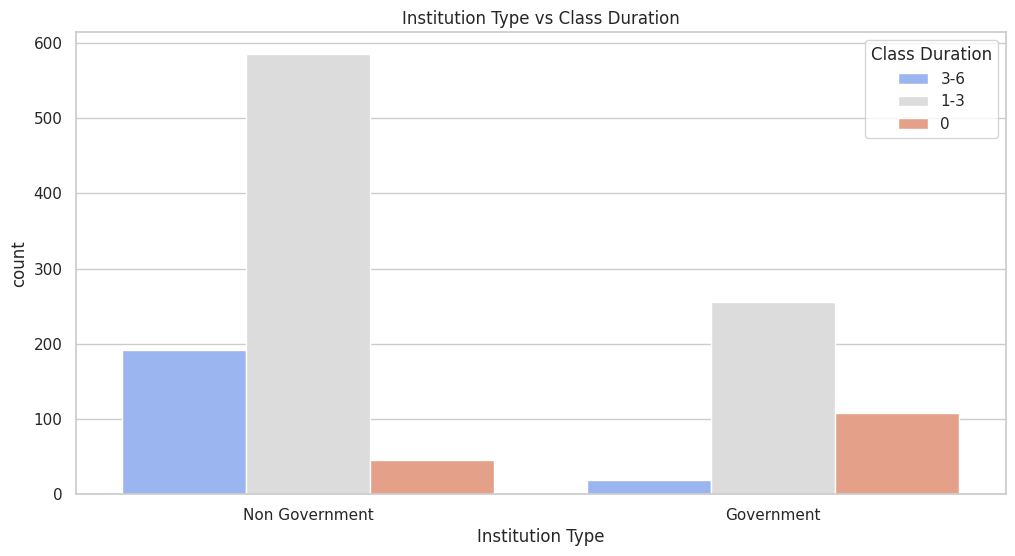

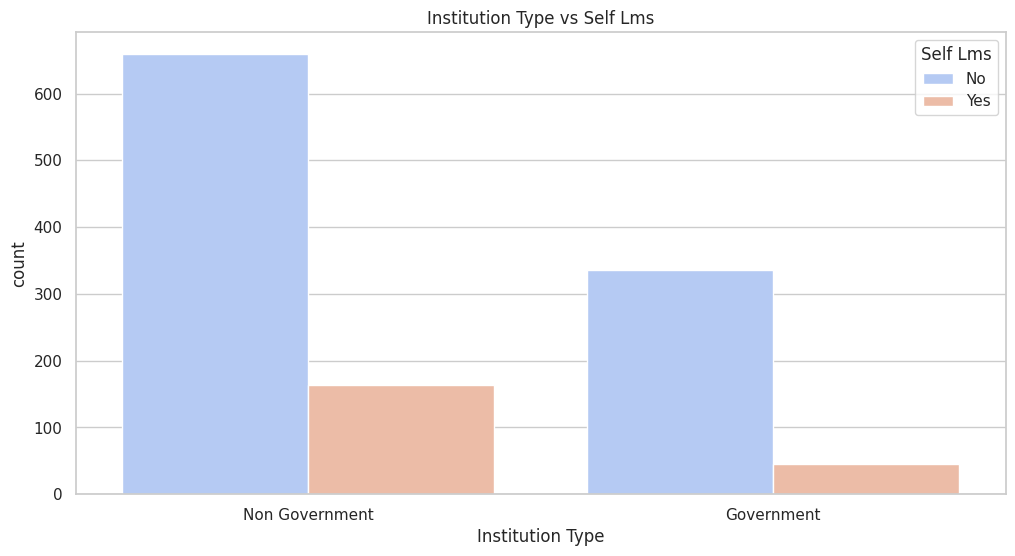

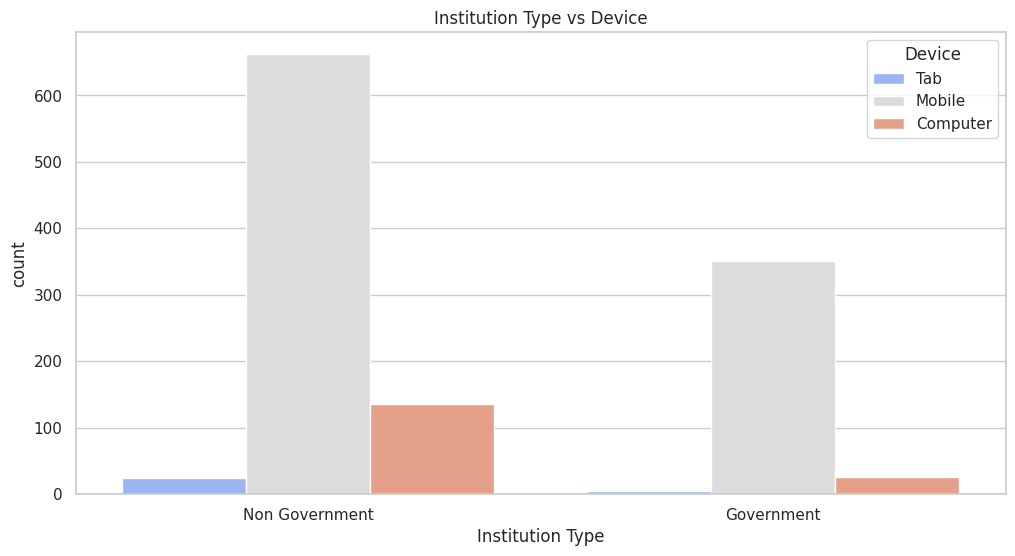

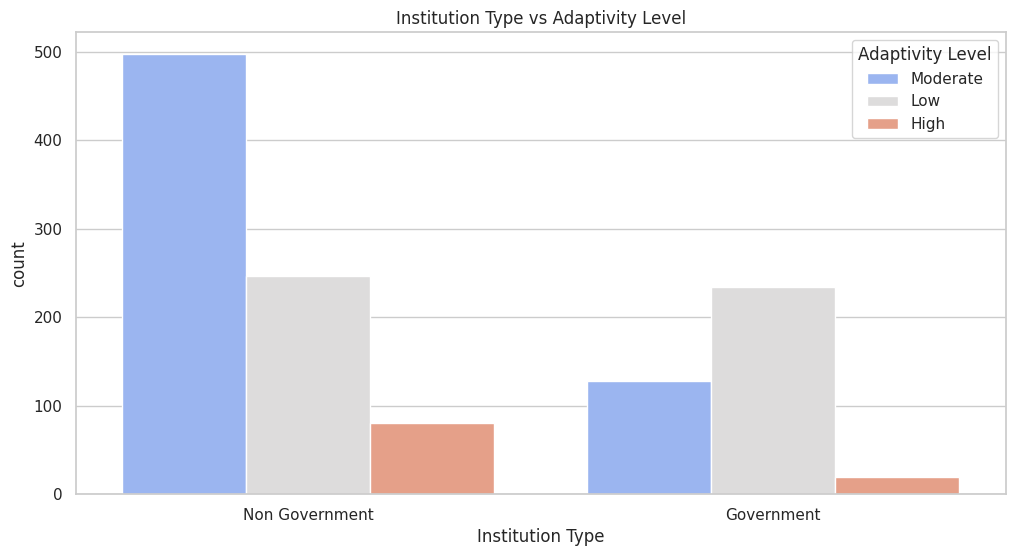

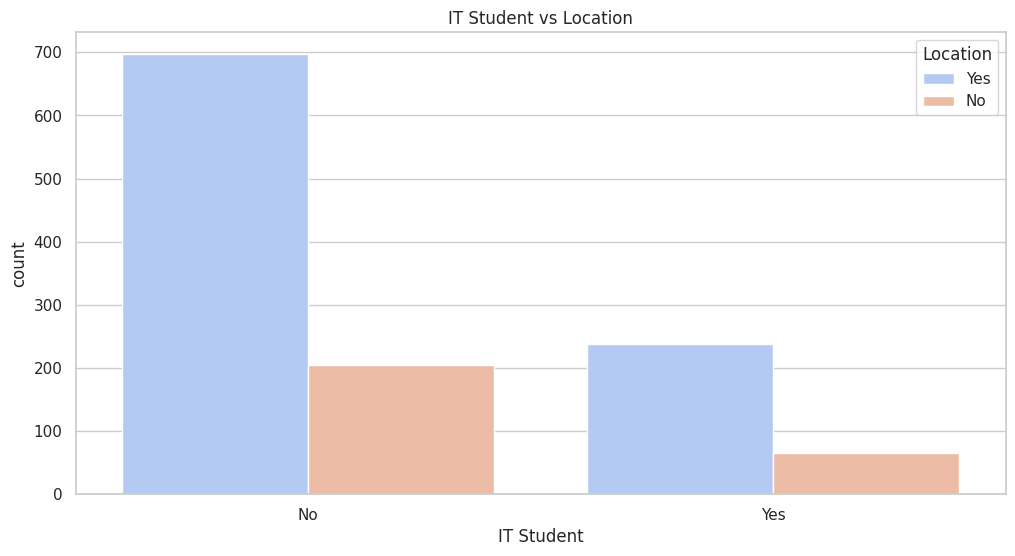

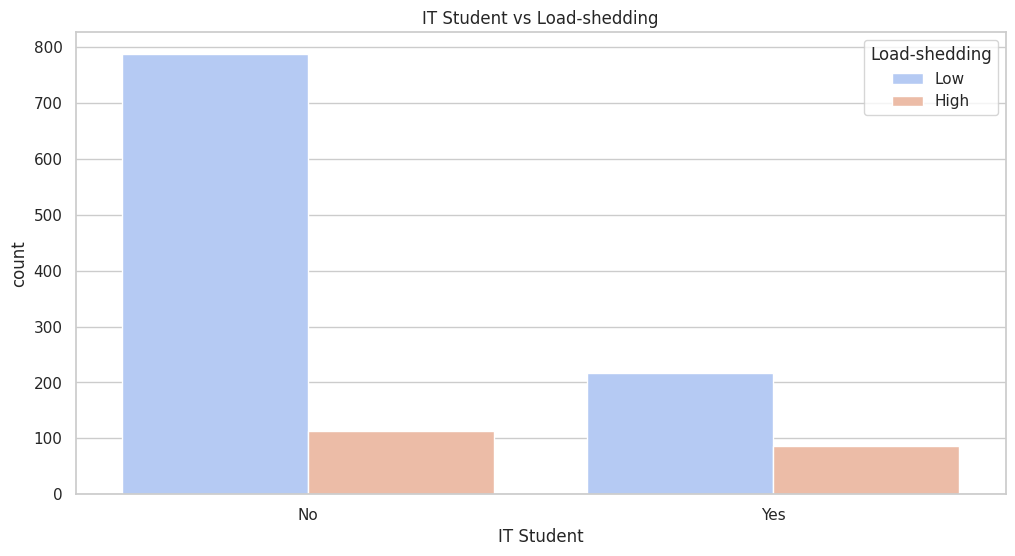

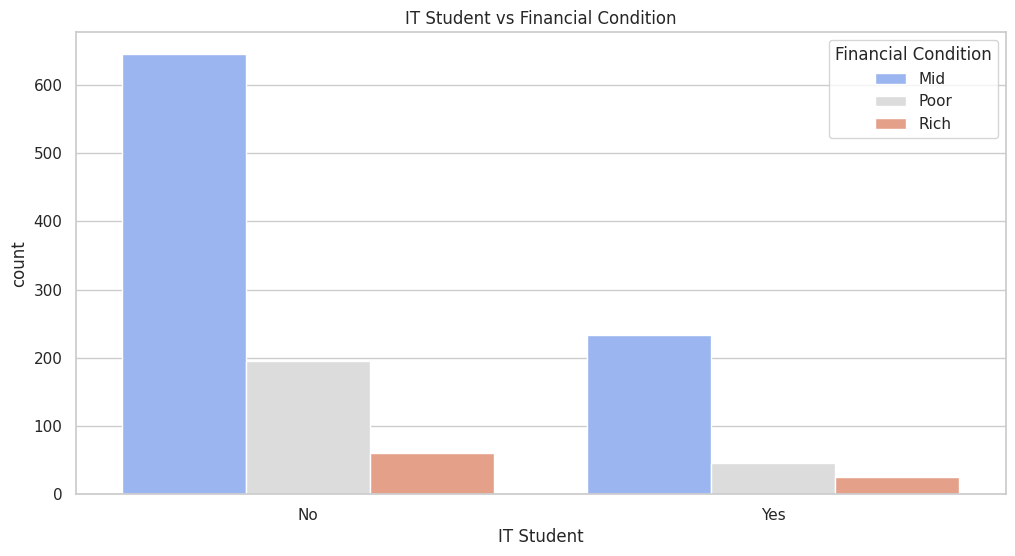

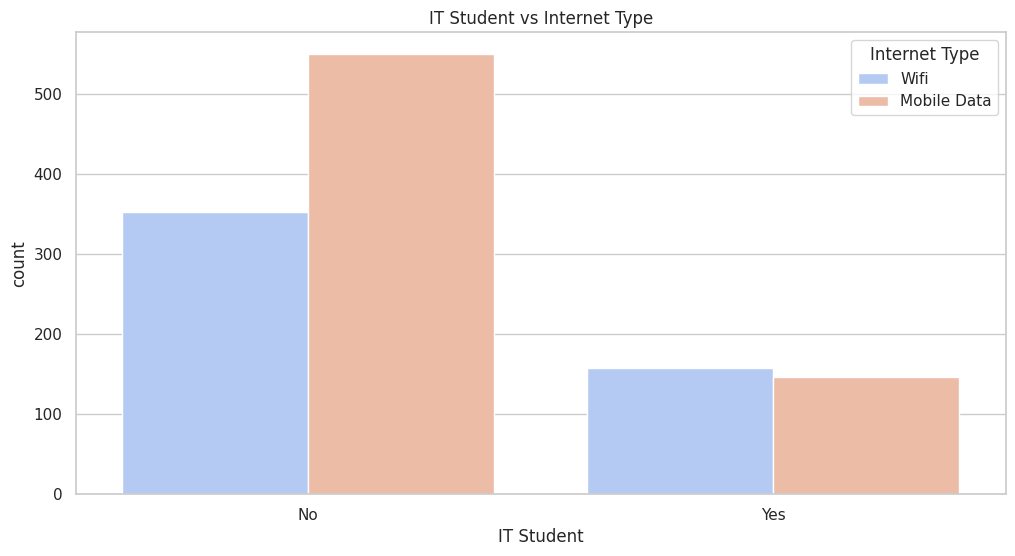

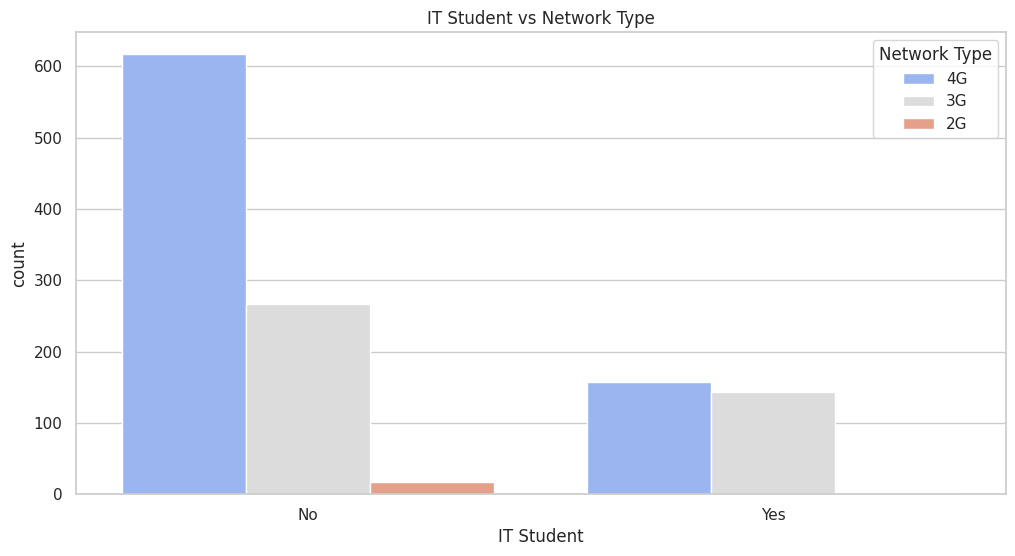

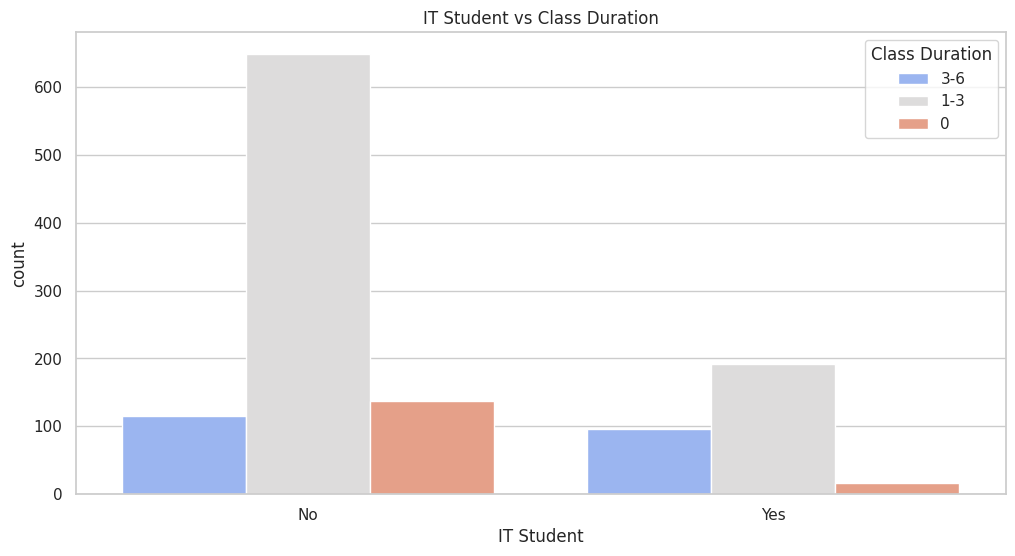

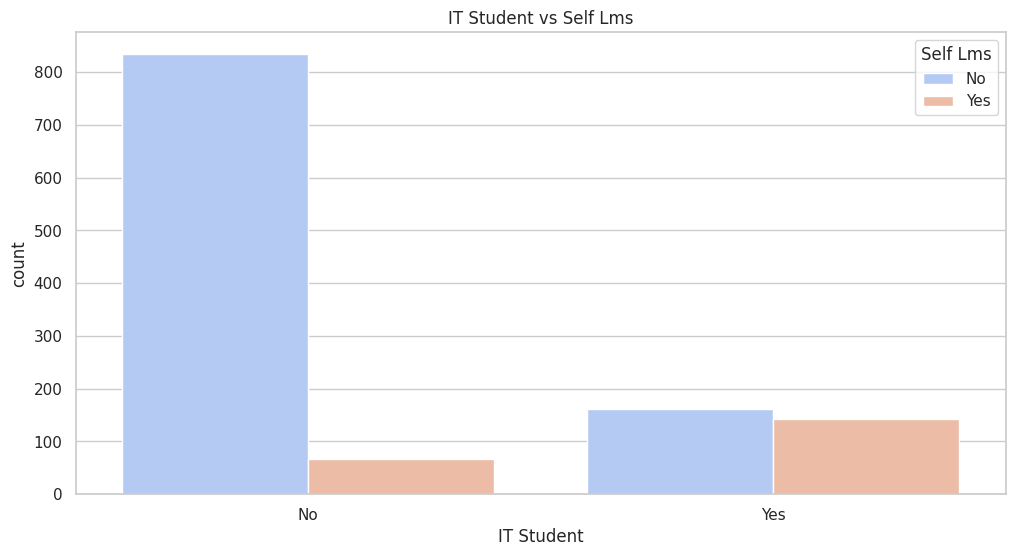

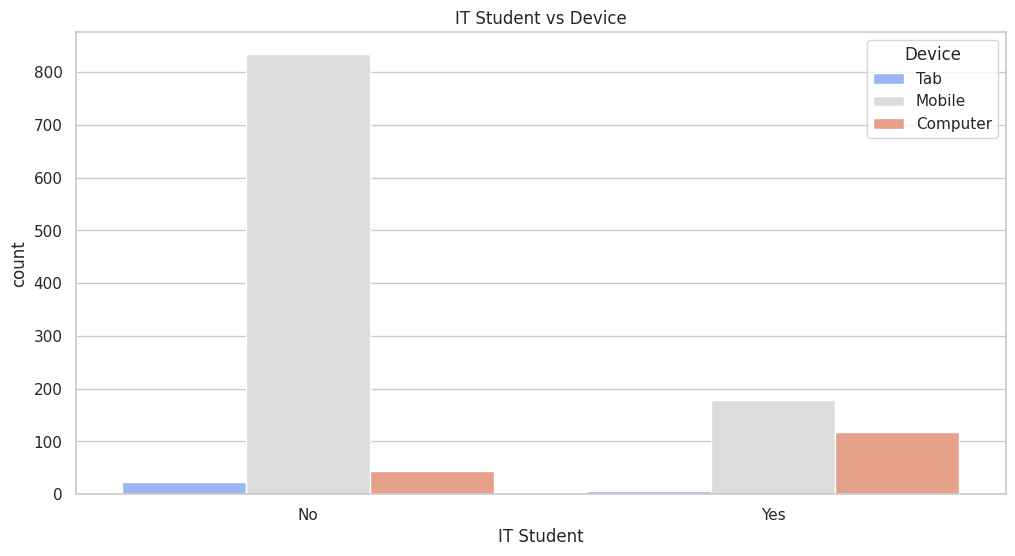

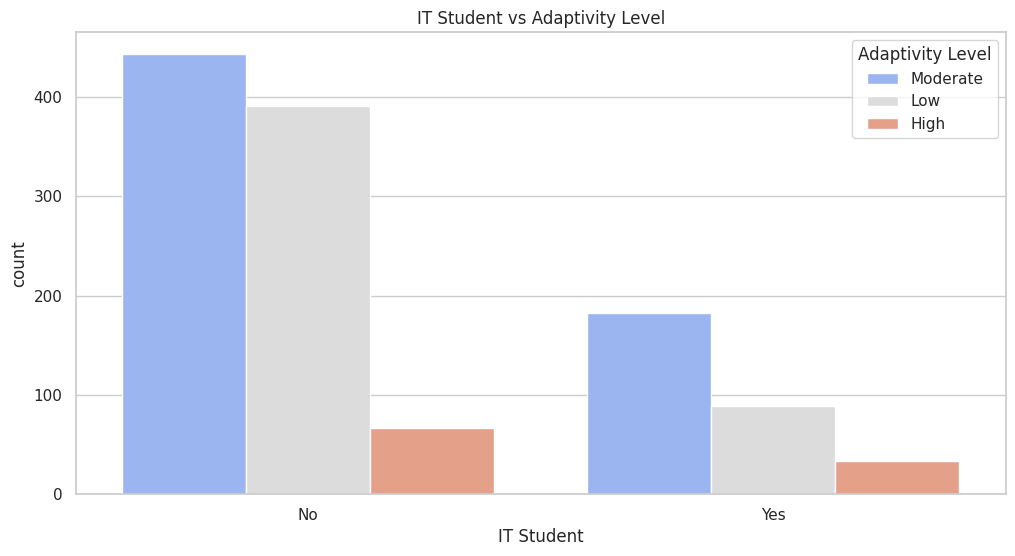

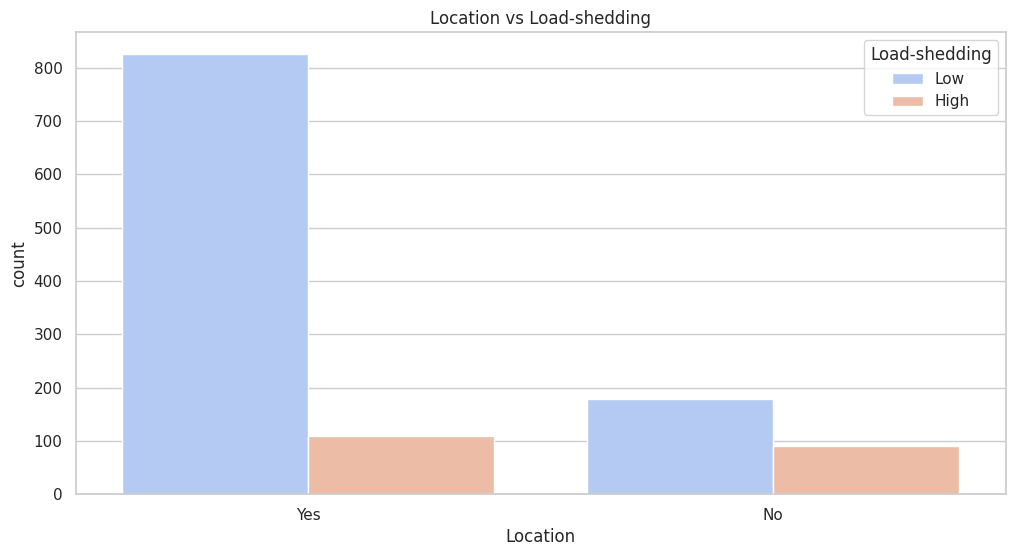

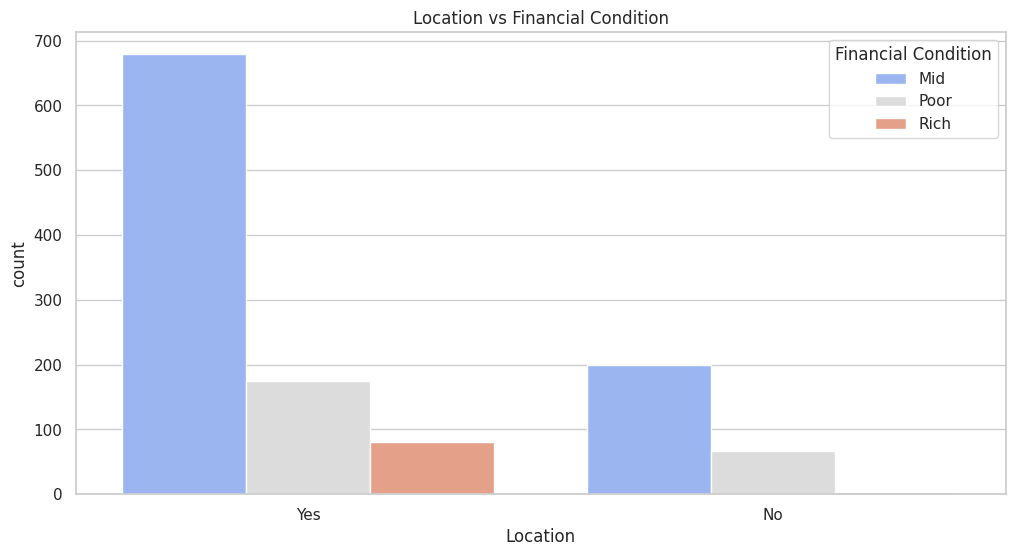

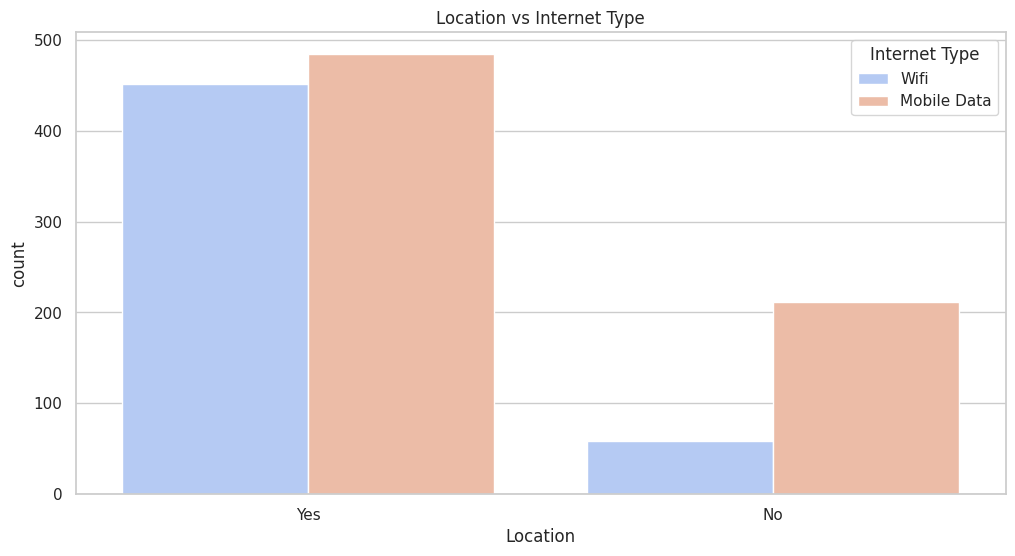

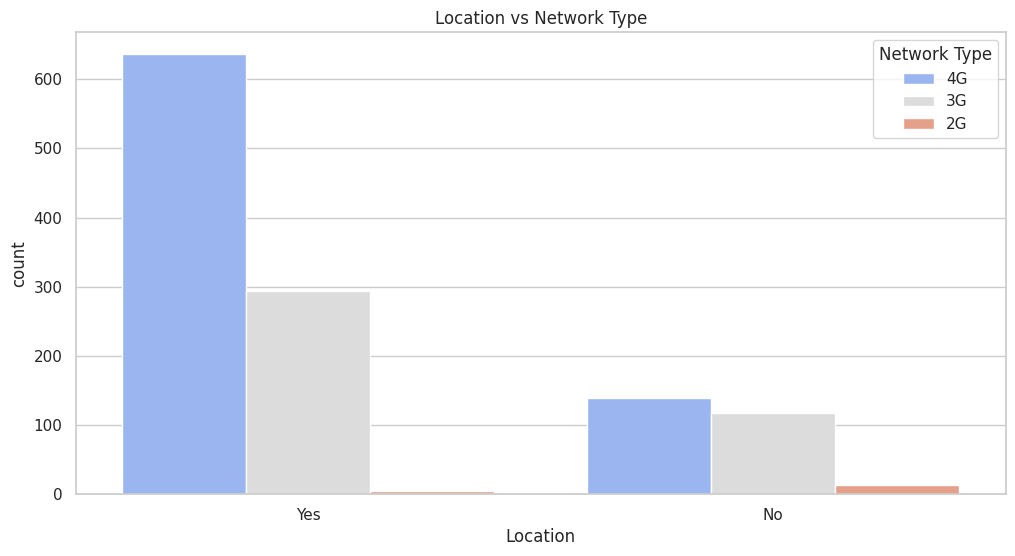

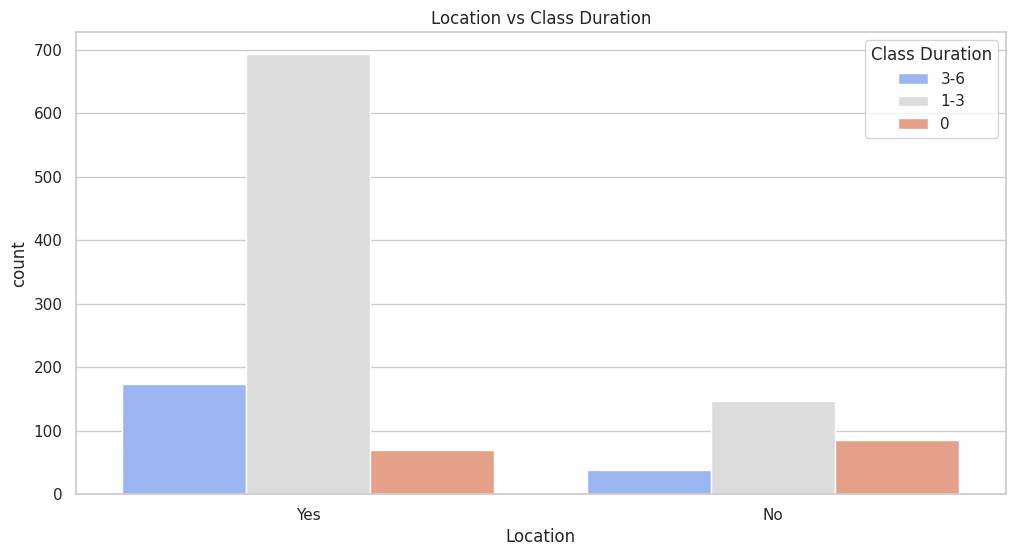

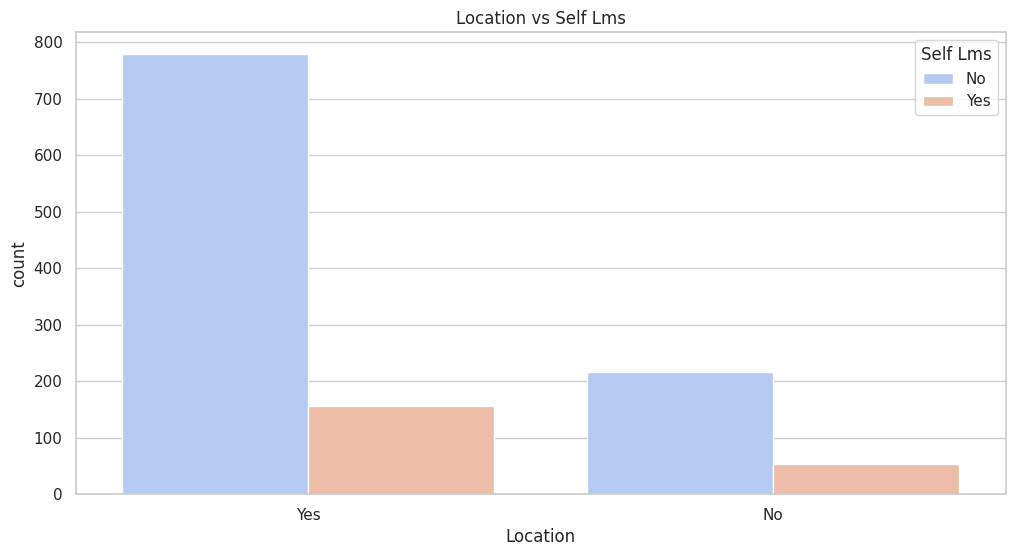

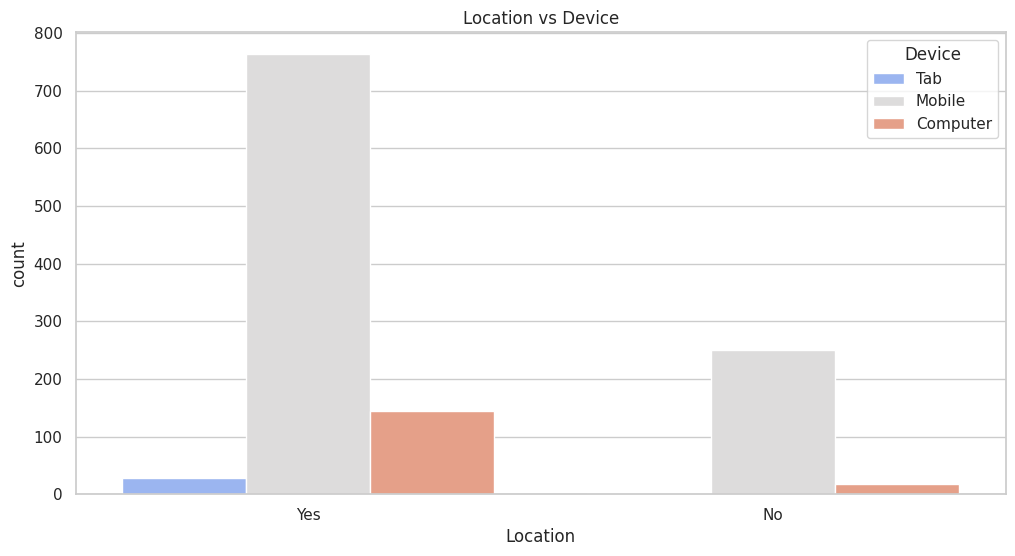

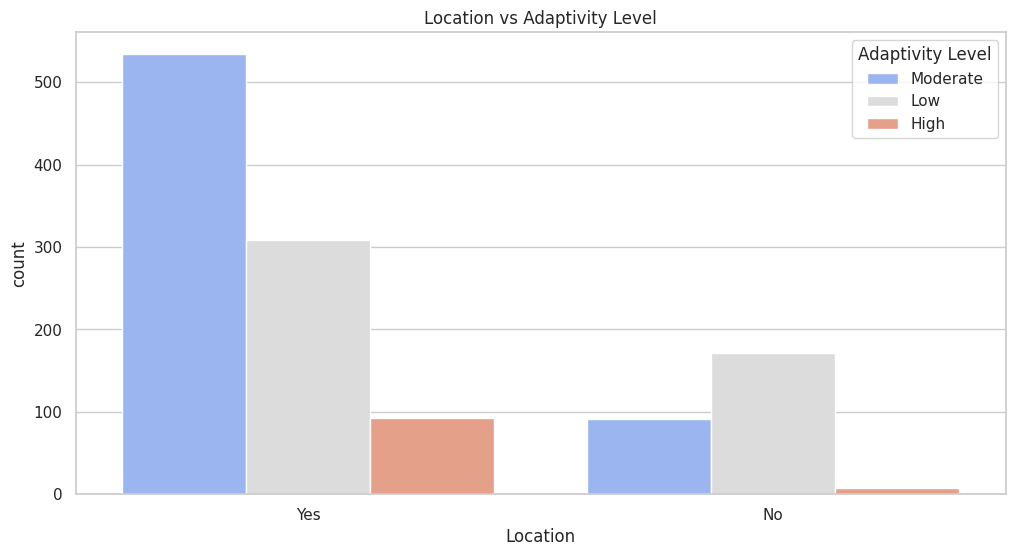

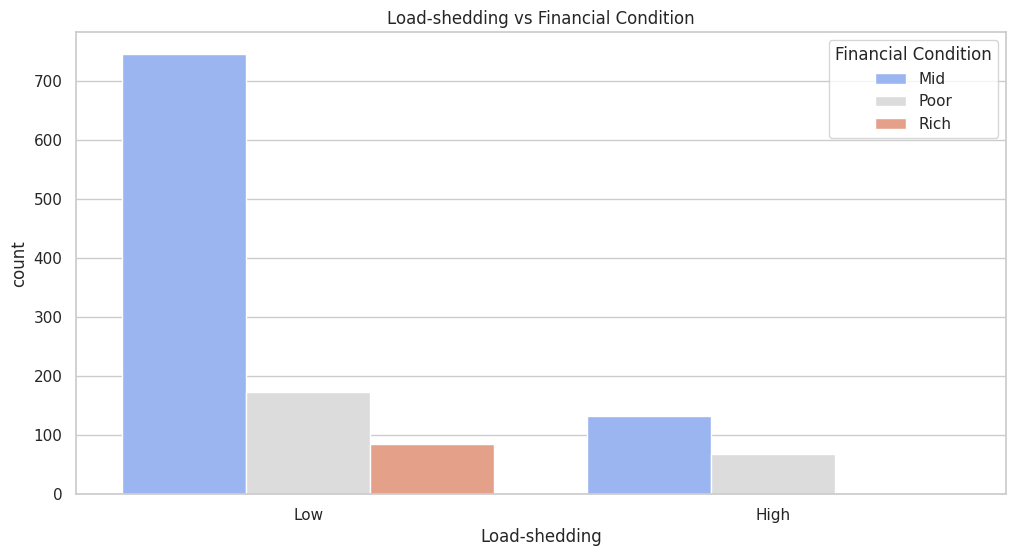

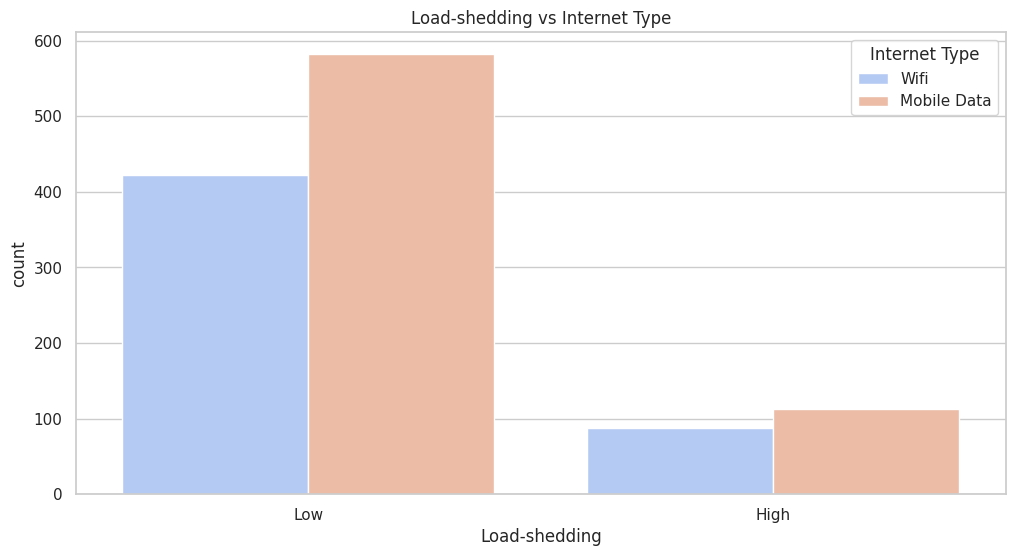

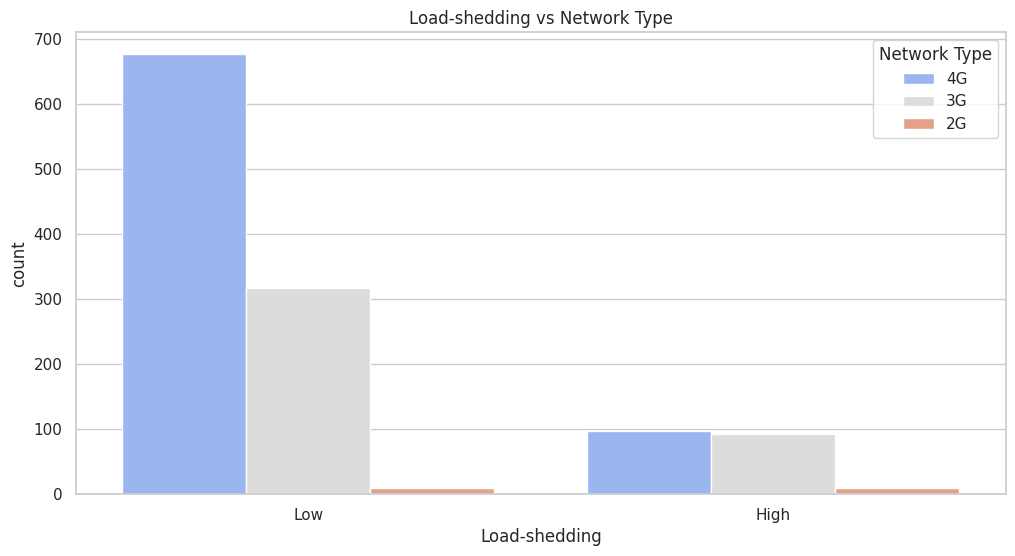

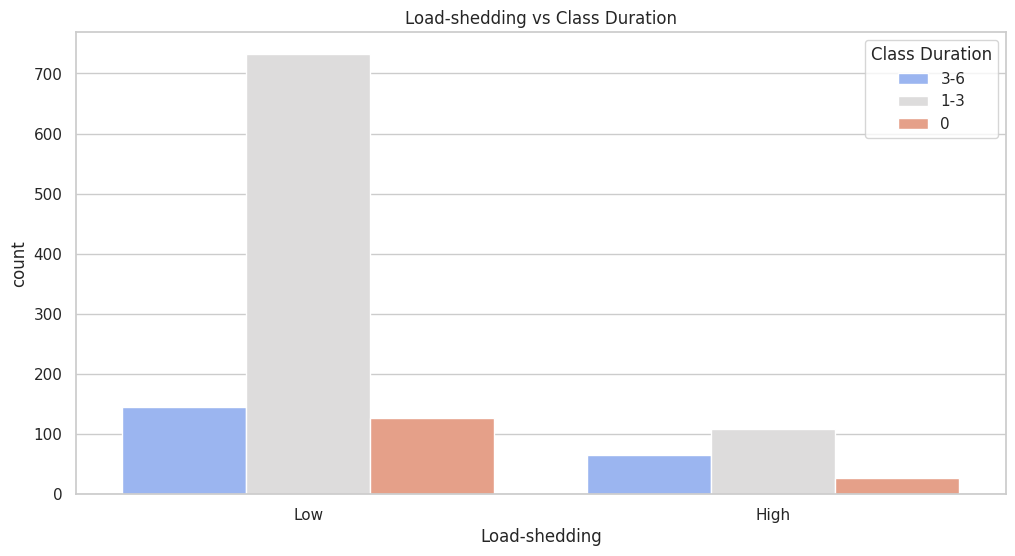

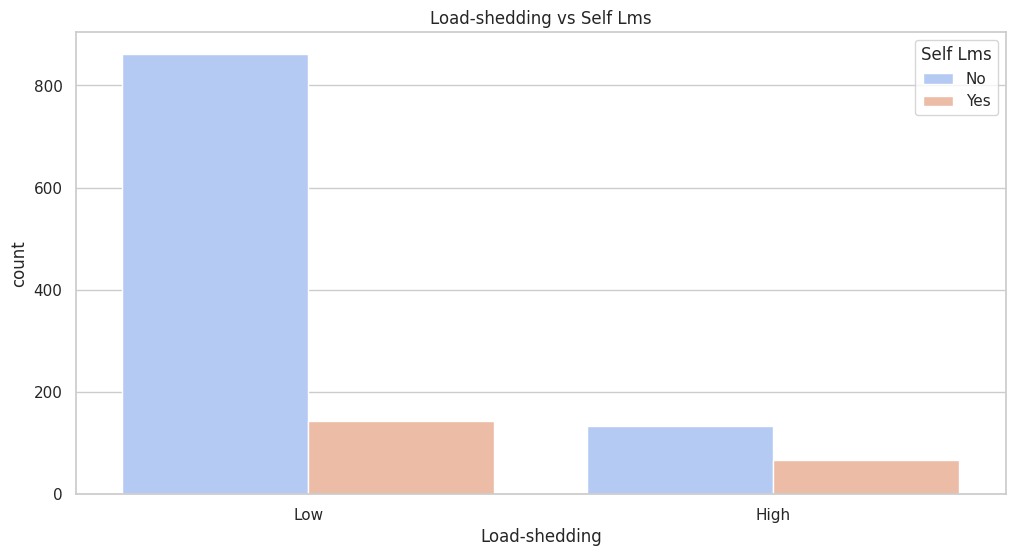

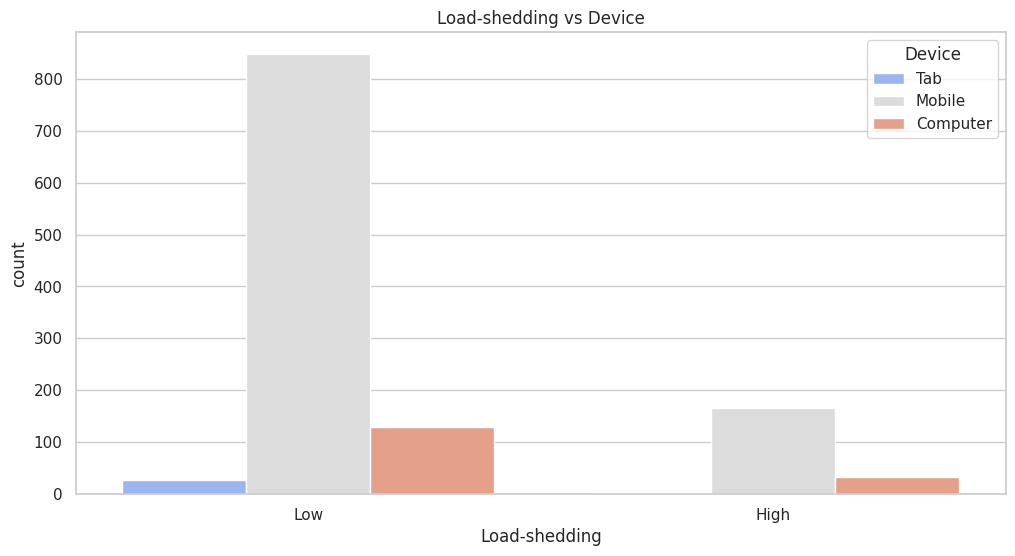

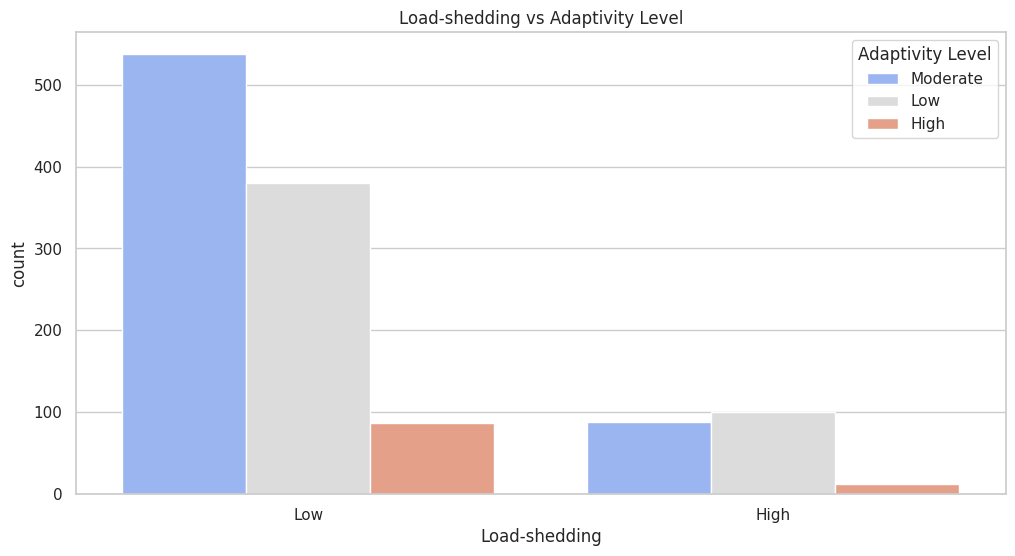

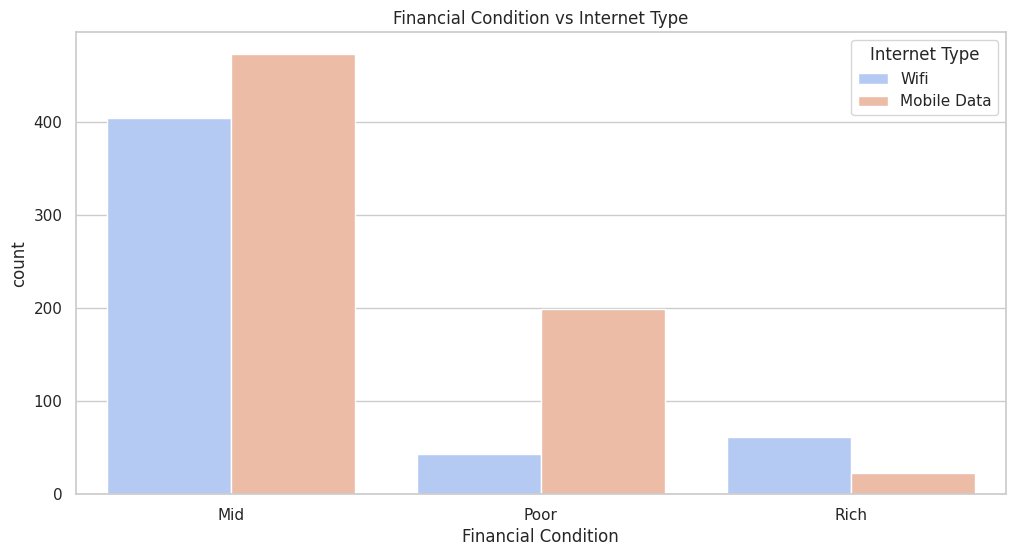

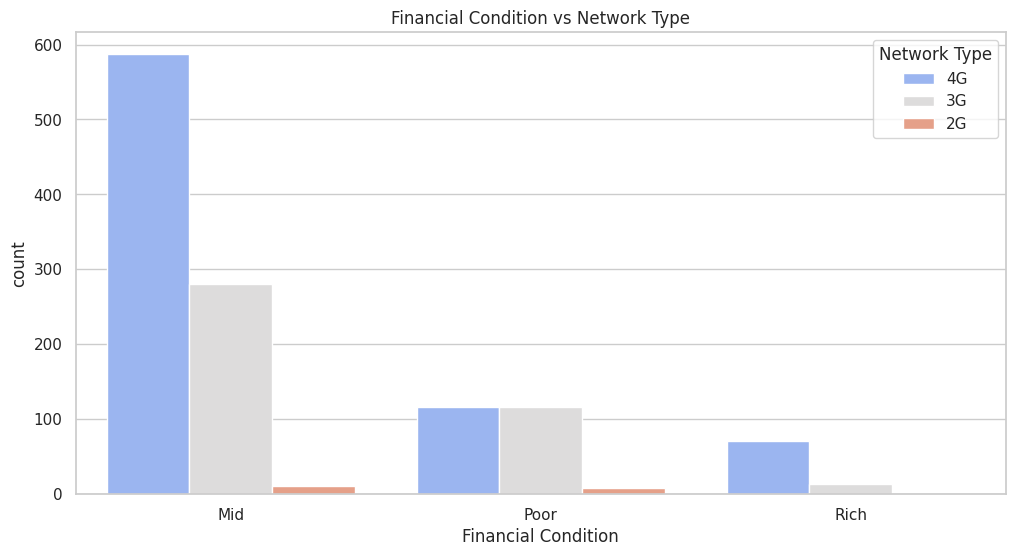

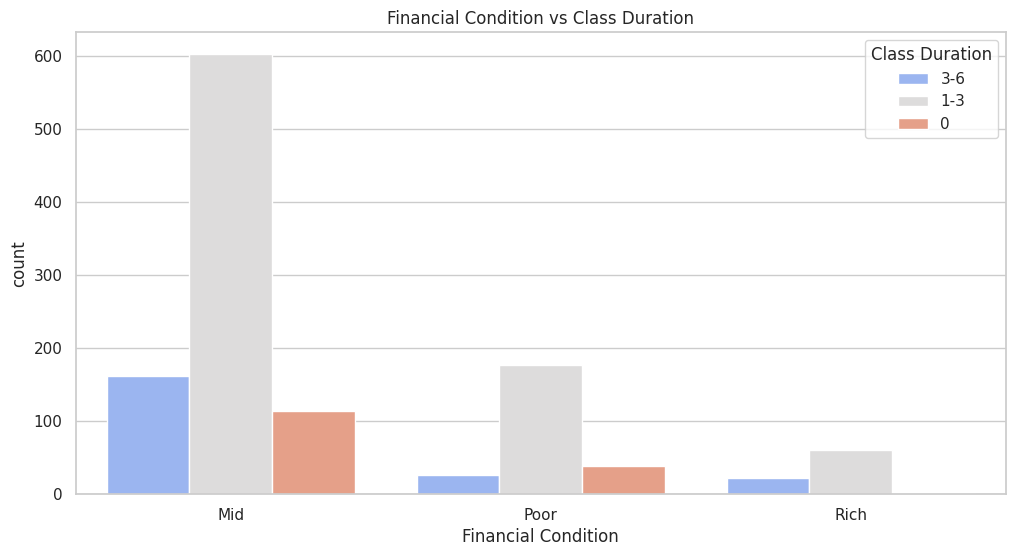

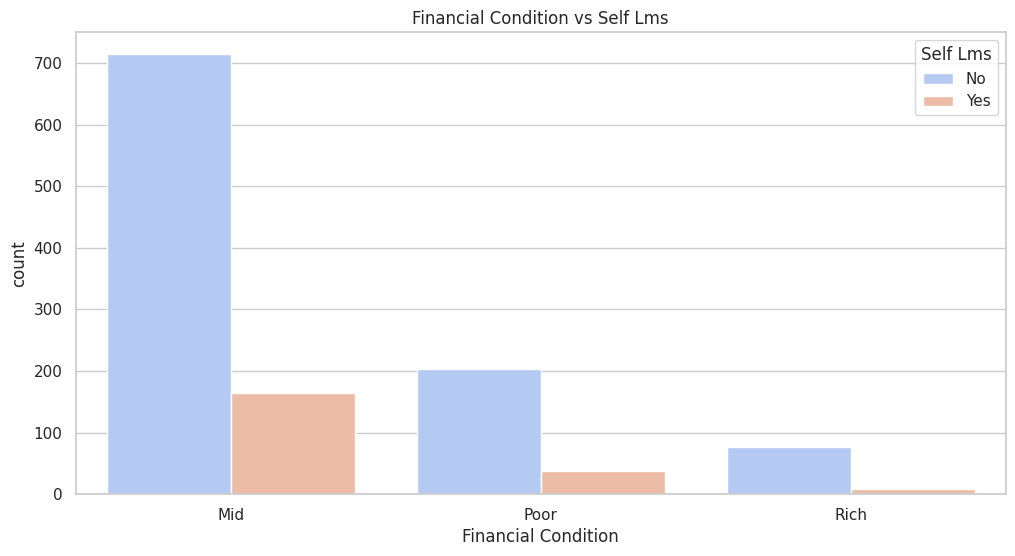

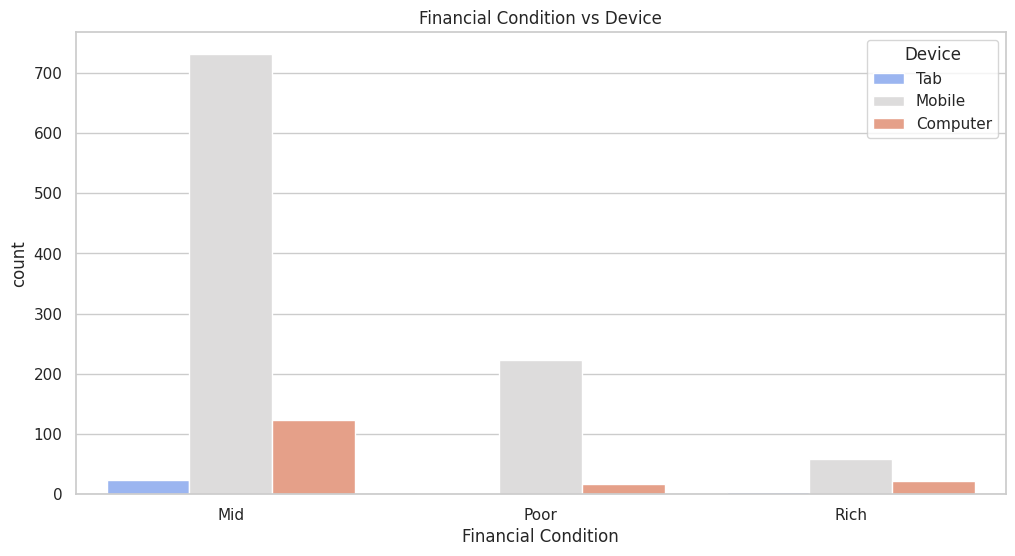

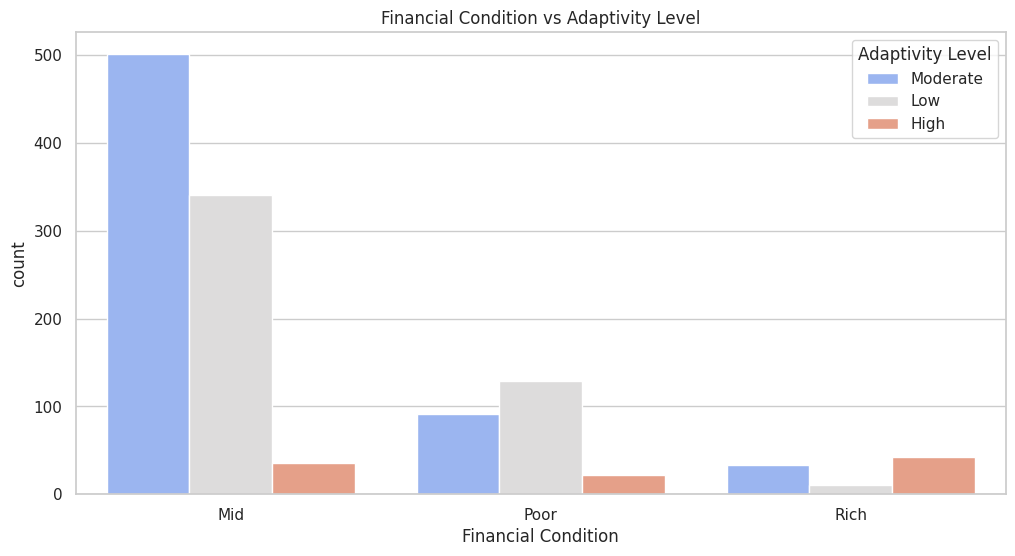

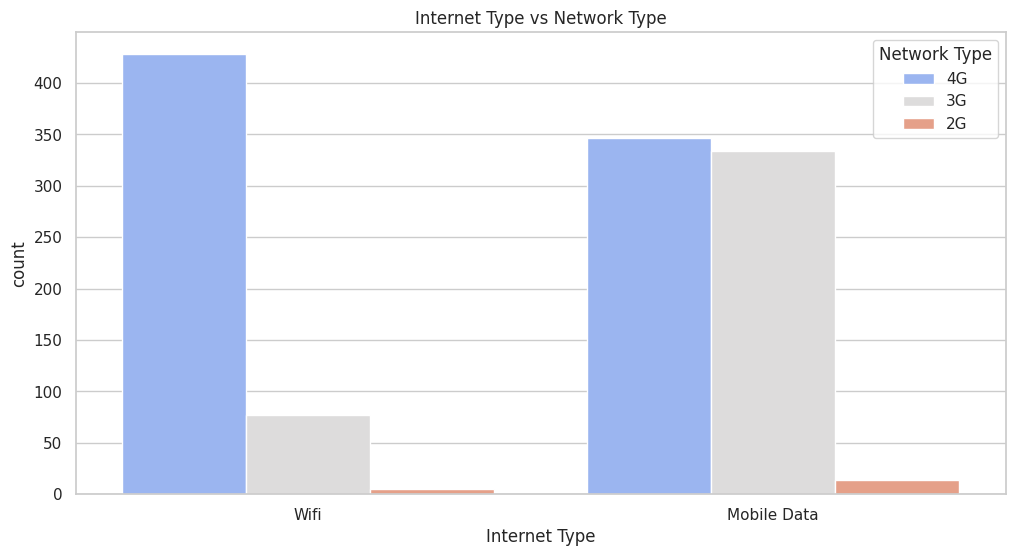

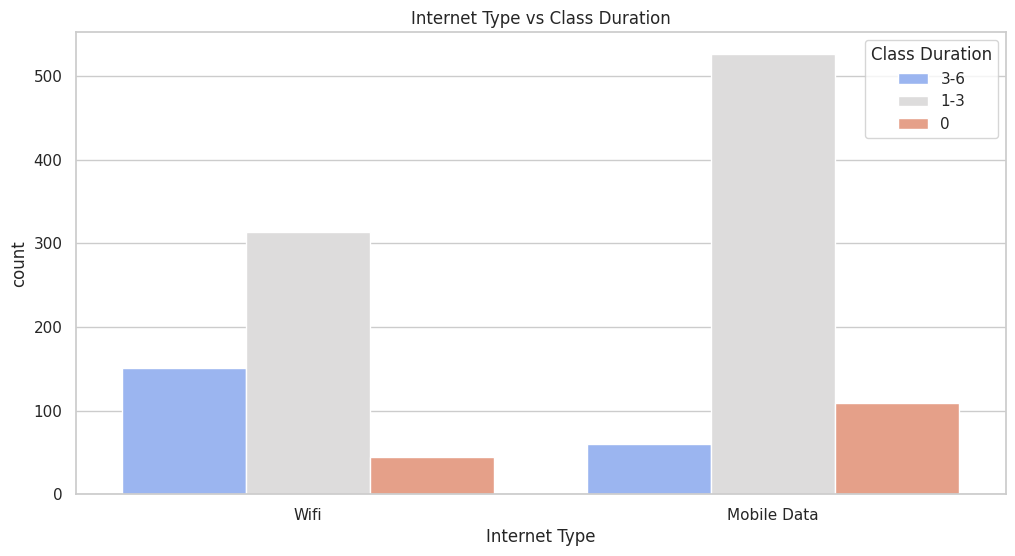

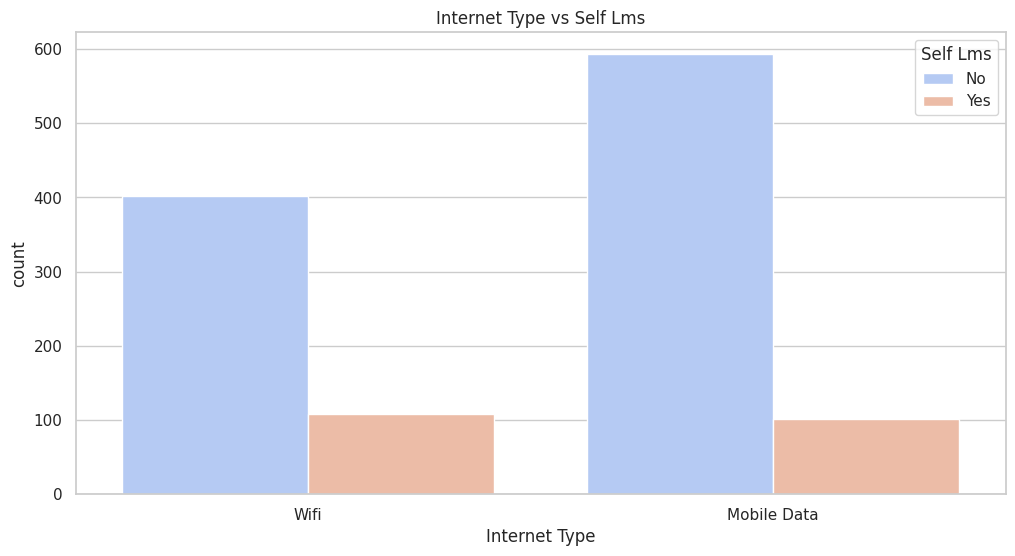

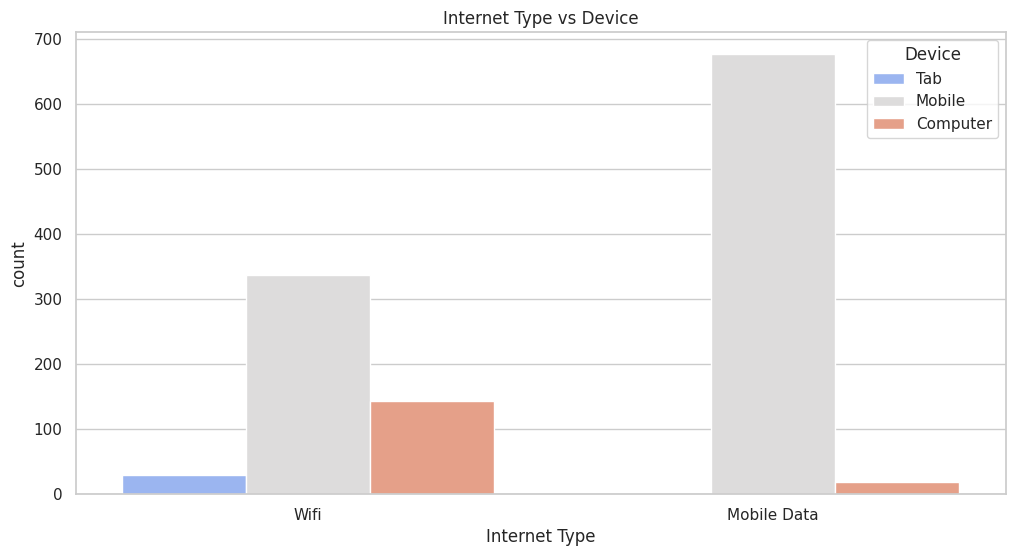

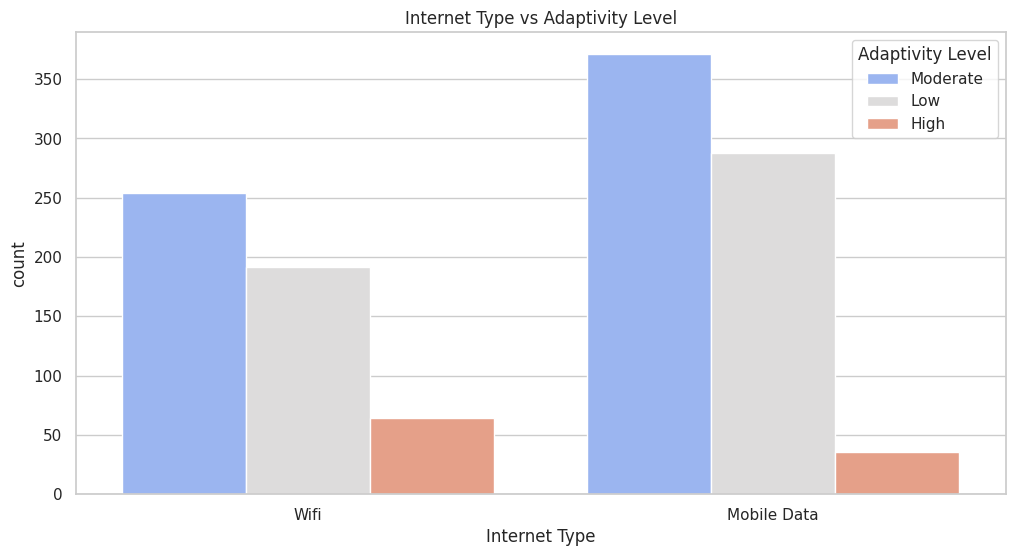

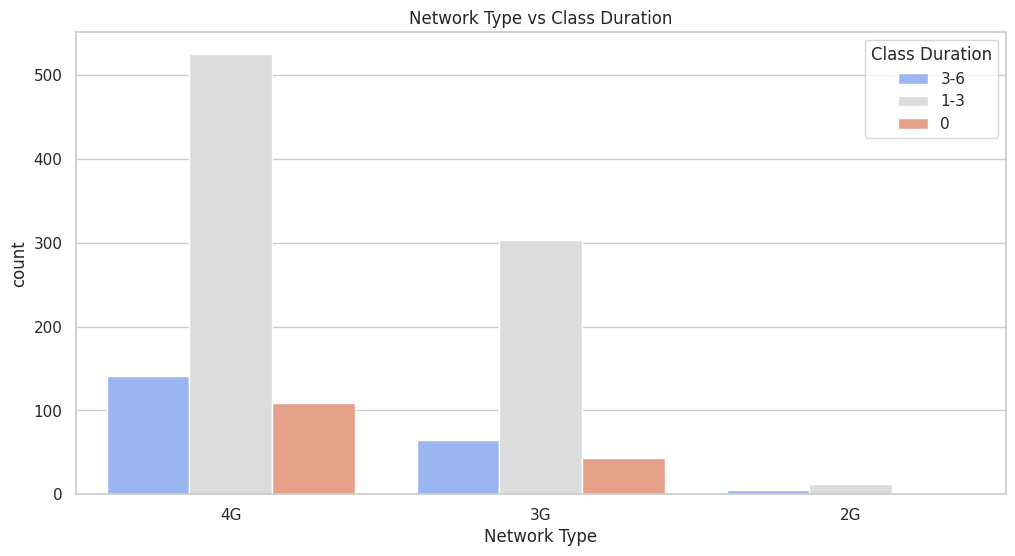

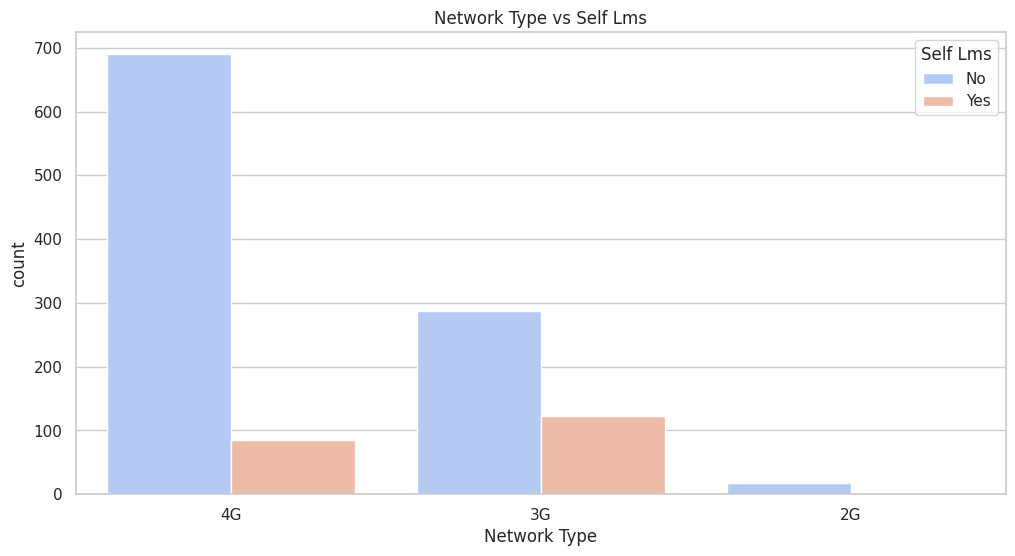

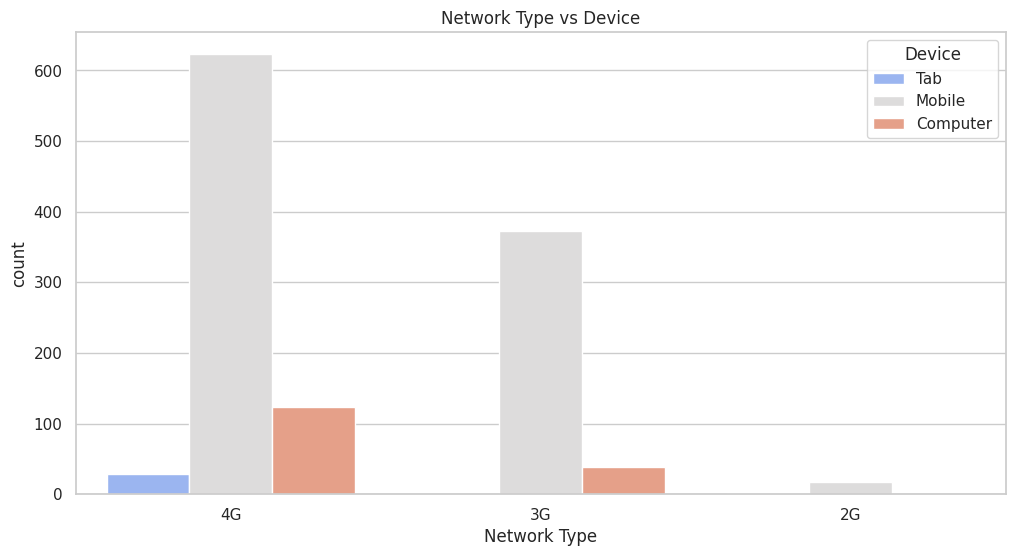

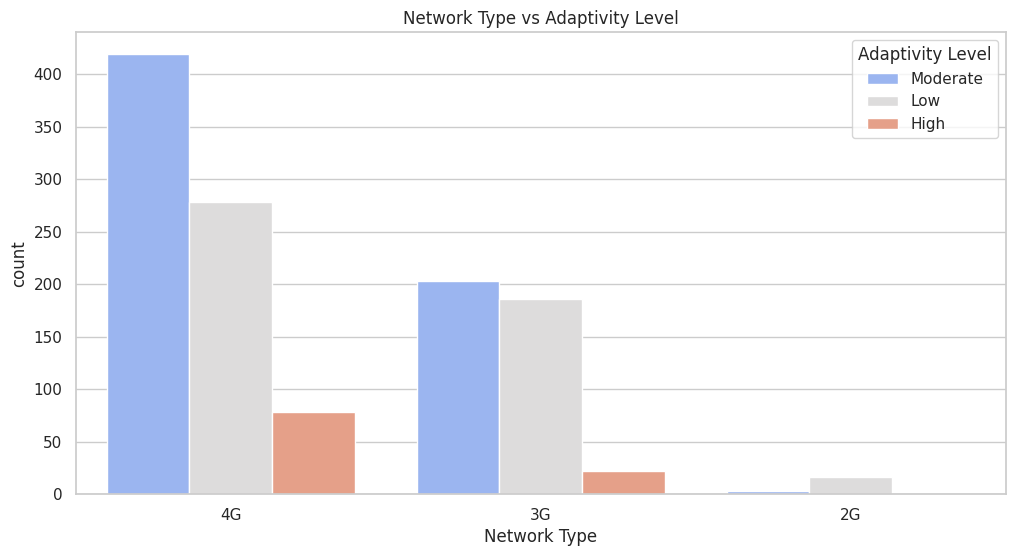

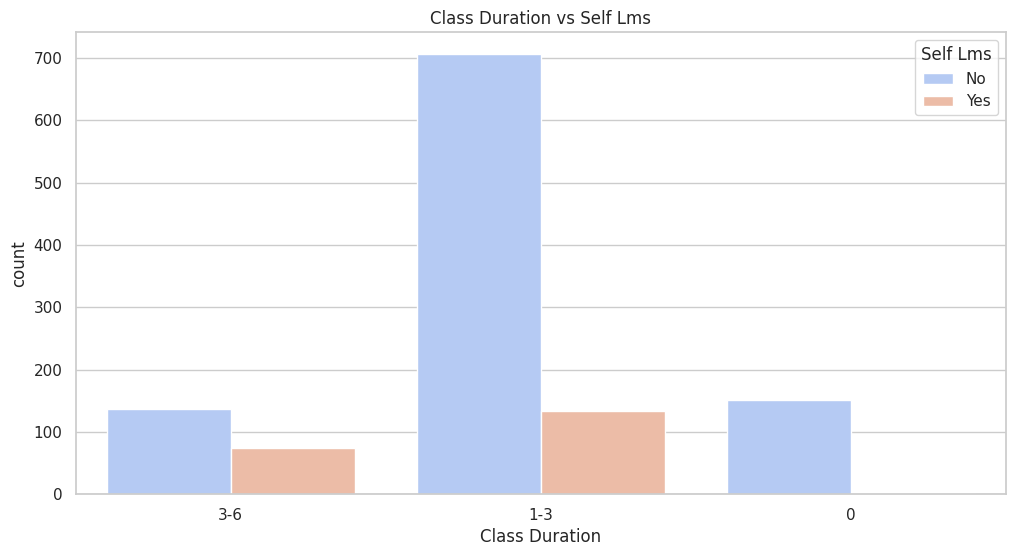

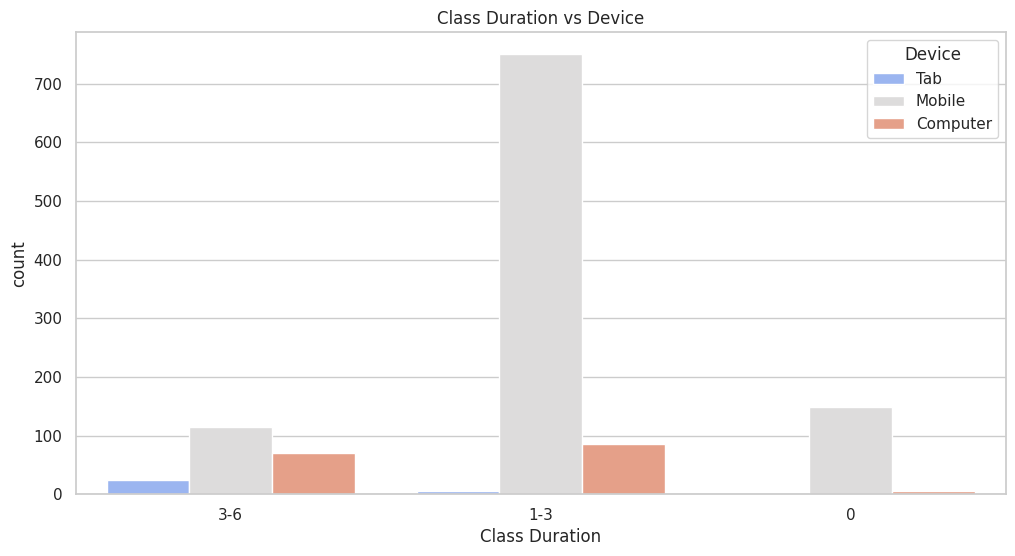

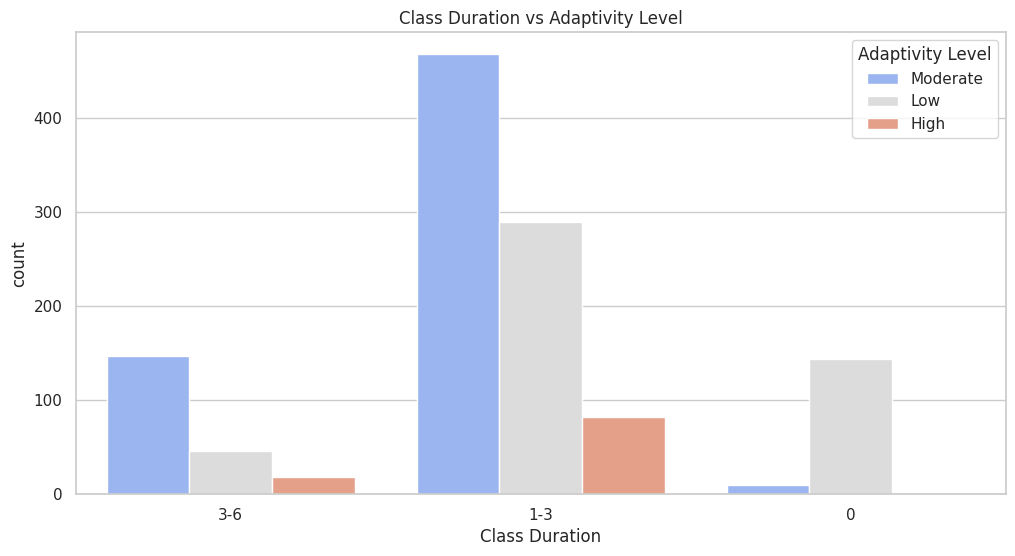

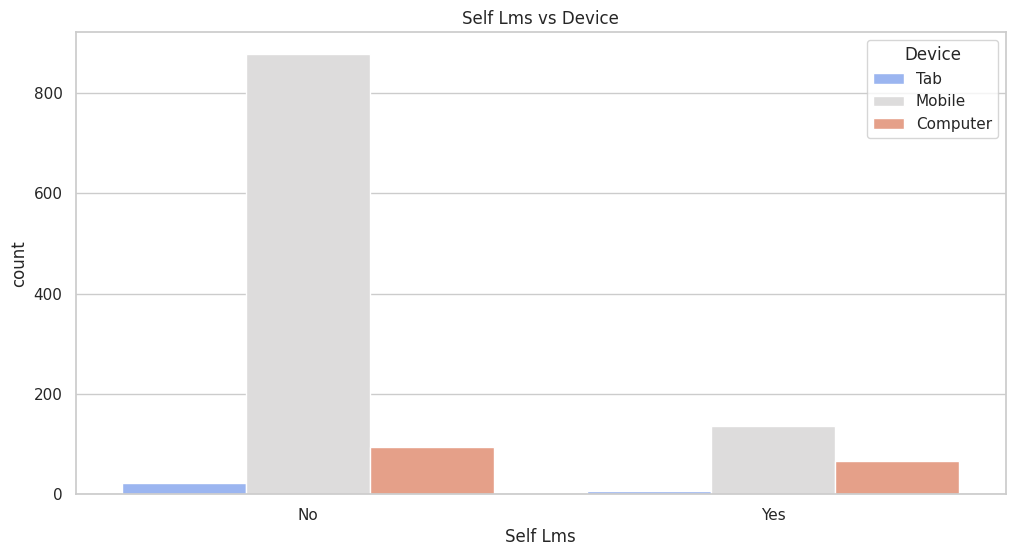

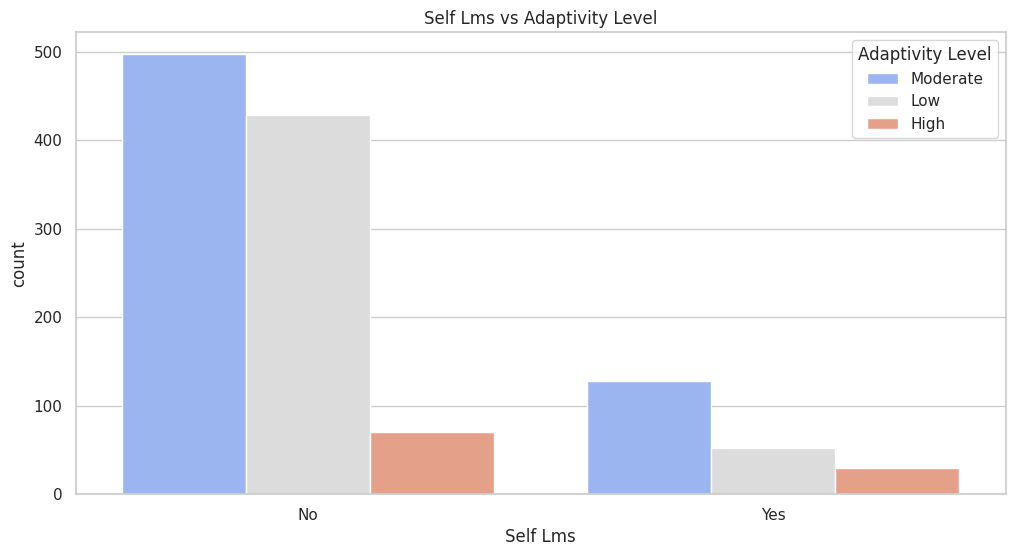

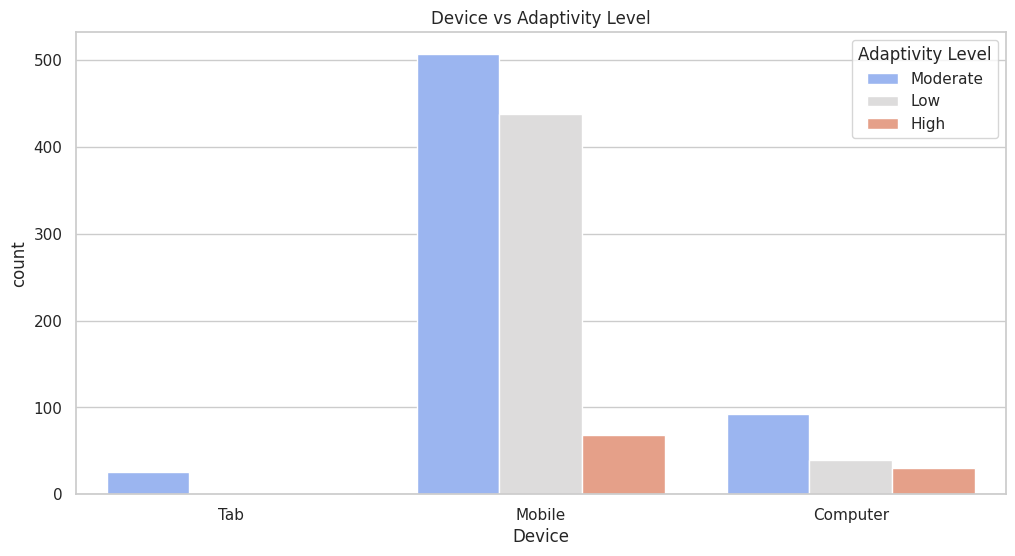

In [15]:
# Plotting count plots for cross-categorical analysis
for i in range(len(df_st.columns)):
    for j in range(i+1, len(df_st.columns)):
        plt.figure(figsize=(12, 6))
        sns.countplot(x=df_st.columns[i], hue=df_st.columns[j], data=df_st, palette="coolwarm")
        plt.title(f'{df_st.columns[i]} vs {df_st.columns[j]}')
        plt.show()


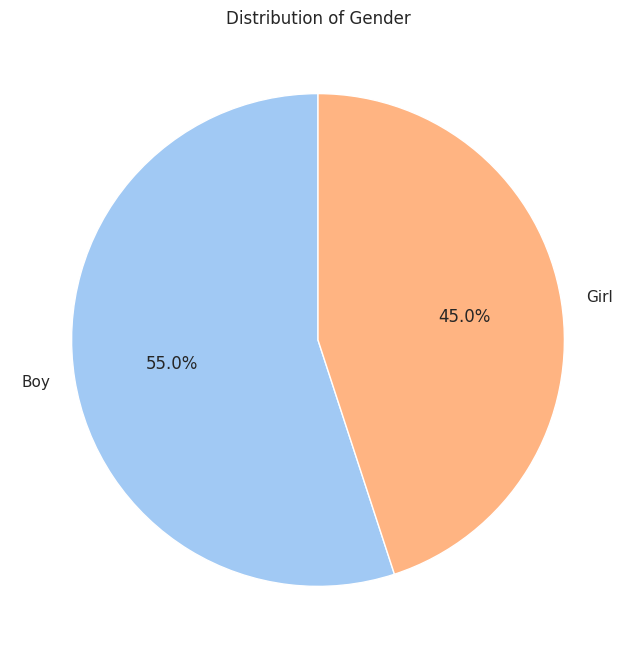

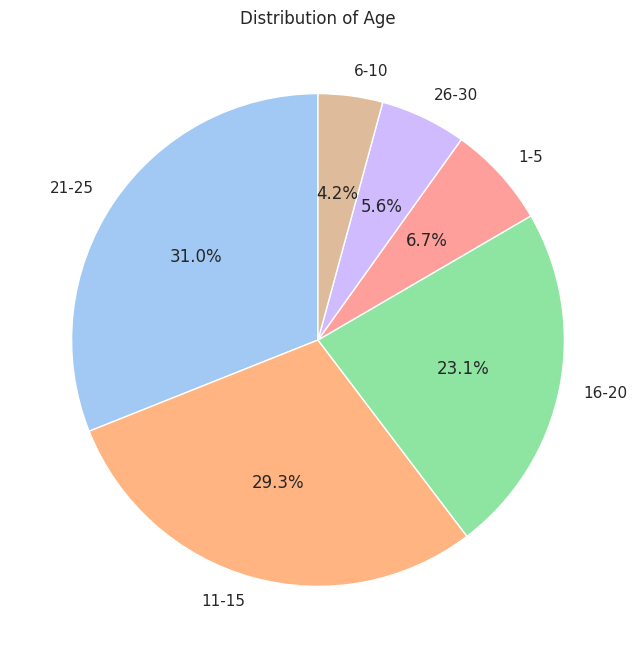

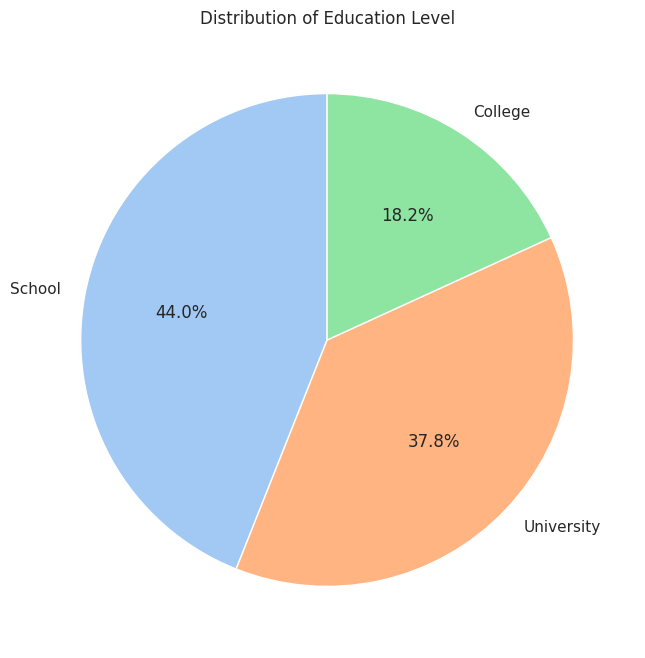

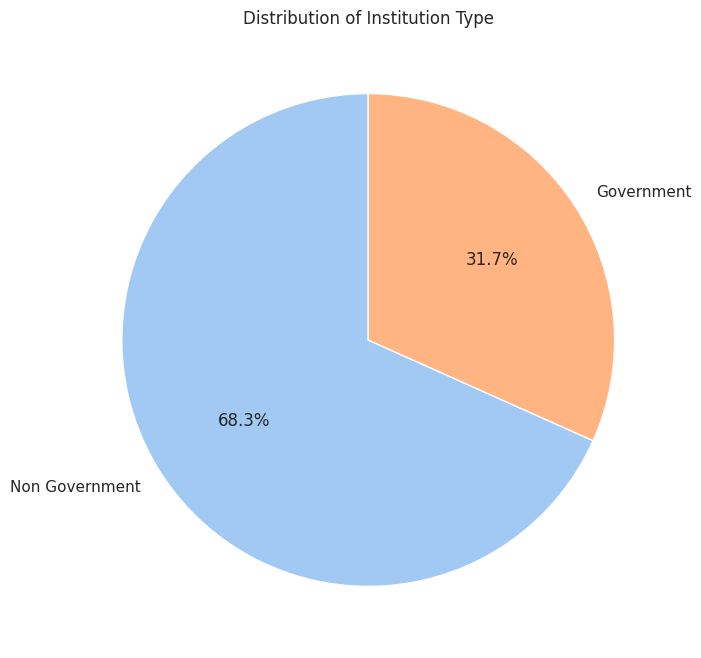

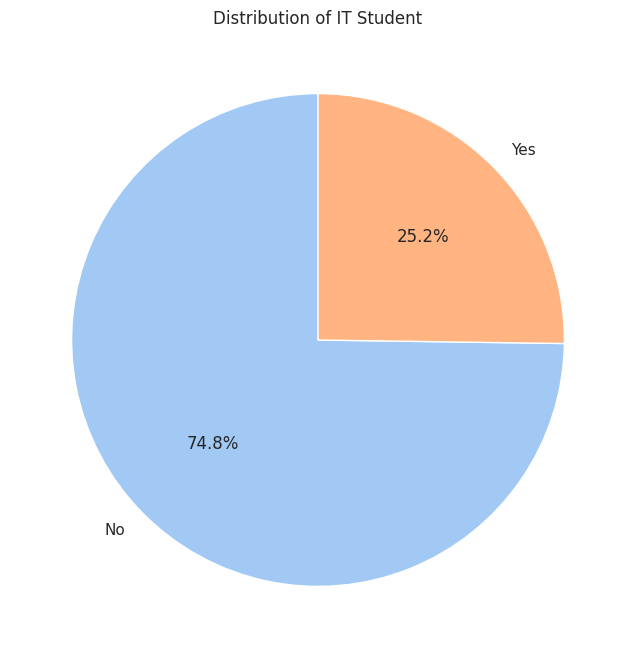

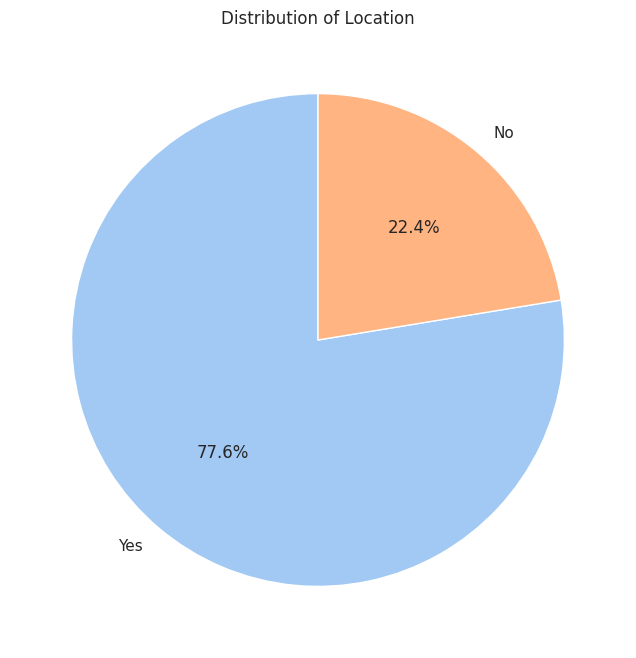

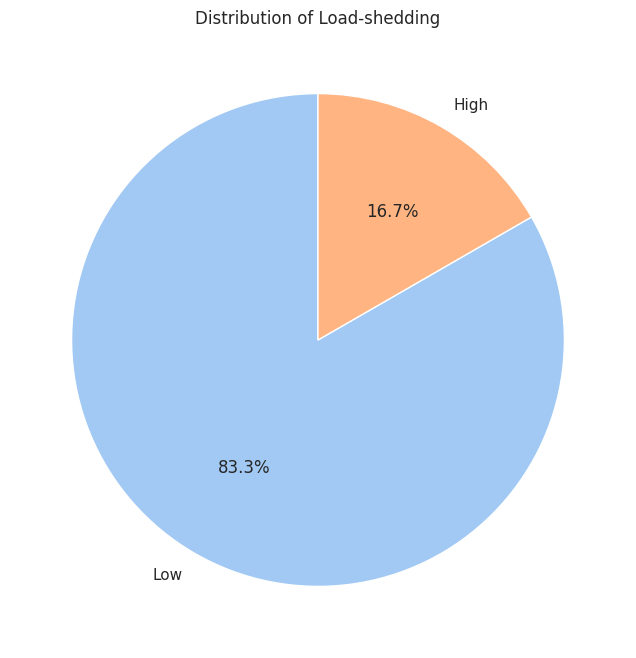

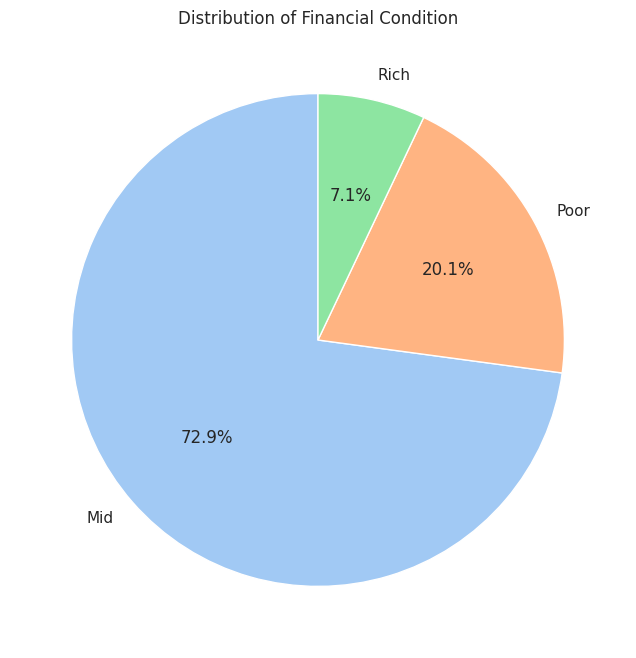

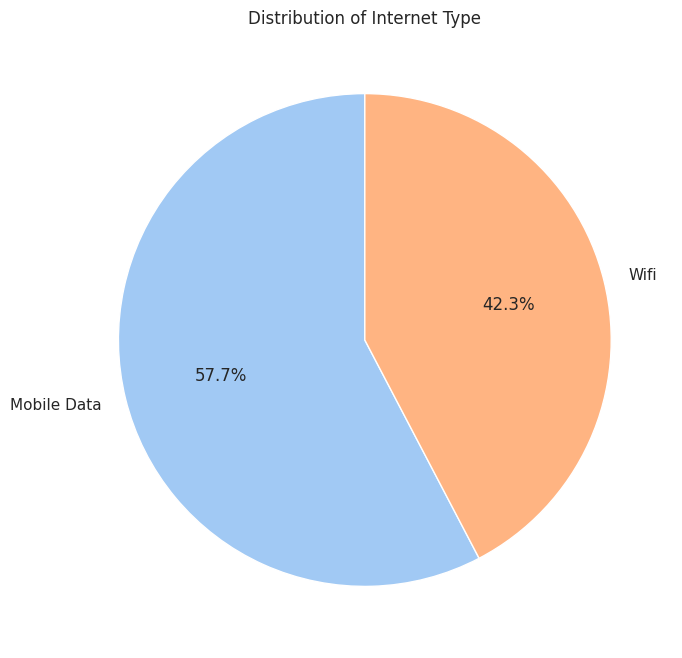

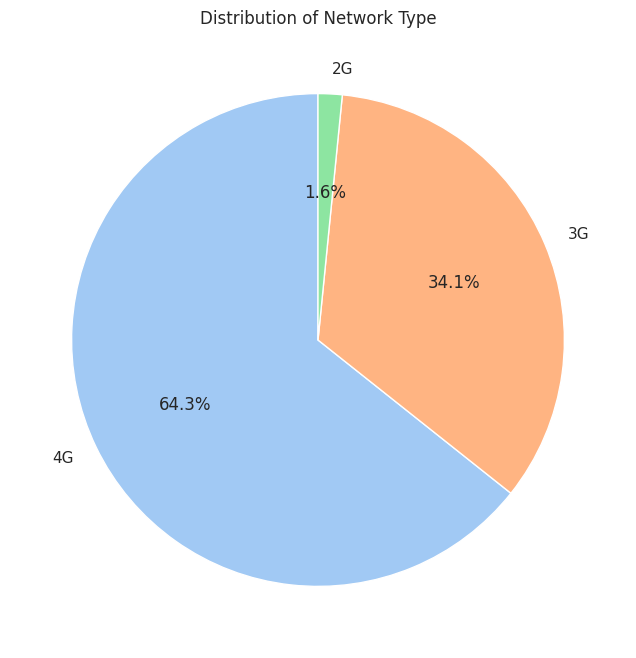

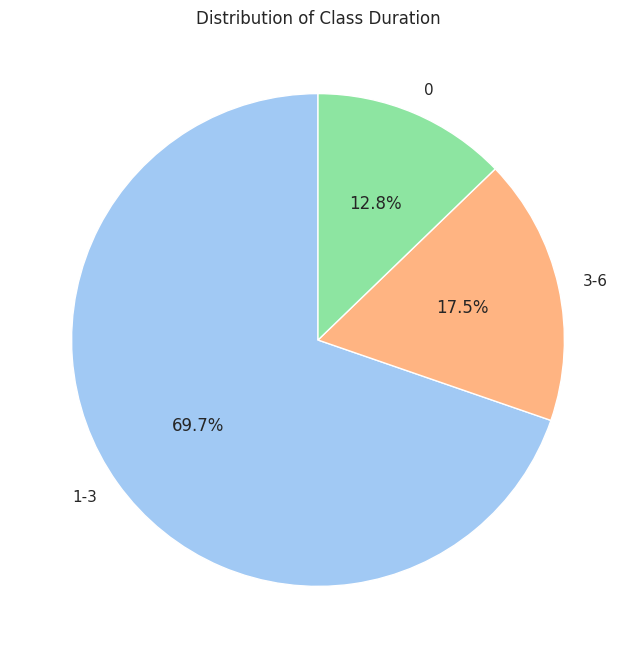

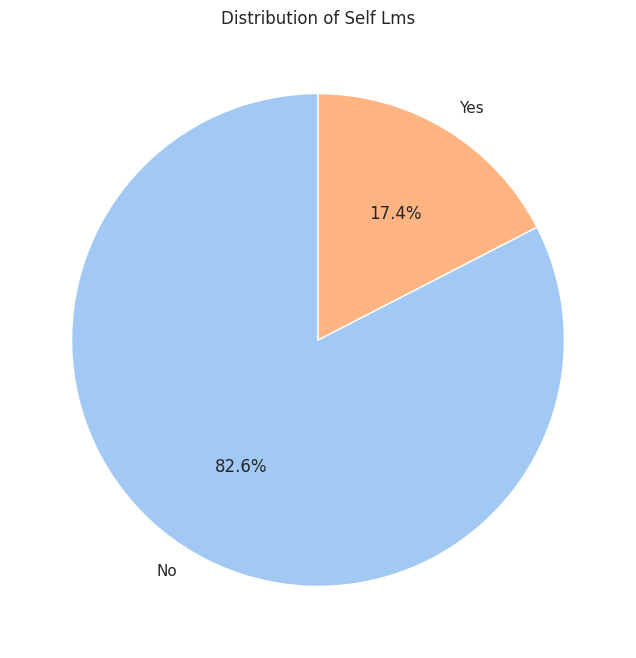

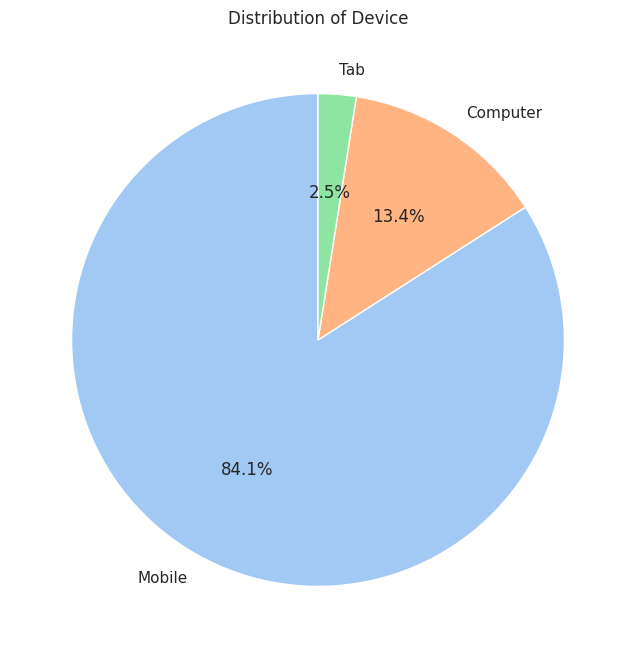

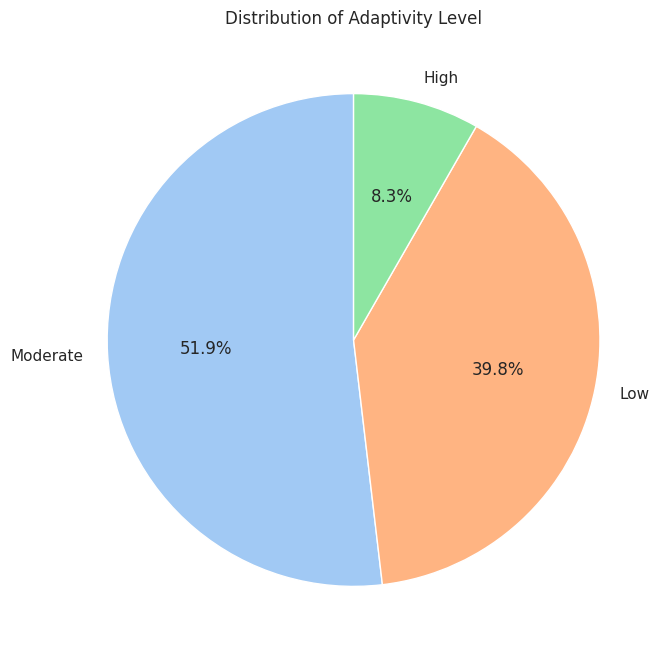

In [16]:
# Plotting pie charts for each categorical column
for column in df_st.columns:
    plt.figure(figsize=(8, 8))
    df_st[column].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
    plt.title(f'Distribution of {column}')
    plt.ylabel('')
    plt.show()


# Decision Tree Classifier

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Assuming df_st is your DataFrame
X = df_st.drop('Adaptivity Level', axis=1)
y = df_st['Adaptivity Level']

# Label encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# One-hot encode the features
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy (Decision Tree): {accuracy_dt:.2f}")

print("\nClassification Report (Decision Tree):")
print(classification_report(y_test, y_pred_dt))

print("\nConfusion Matrix (Decision Tree):")
print(confusion_matrix(y_test, y_pred_dt))


Accuracy (Decision Tree): 0.90

Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       0.88      0.65      0.75        23
           1       0.92      0.94      0.93       103
           2       0.90      0.92      0.91       115

    accuracy                           0.90       241
   macro avg       0.90      0.84      0.86       241
weighted avg       0.90      0.90      0.90       241


Confusion Matrix (Decision Tree):
[[ 15   0   8]
 [  2  97   4]
 [  0   9 106]]


# Random Forest Classifier

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Assuming df_st is your DataFrame
X = df_st.drop('Adaptivity Level', axis=1)
y = df_st['Adaptivity Level']

# Label encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# One-hot encode the features
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy (Random Forest): {accuracy_rf:.2f}")

print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

print("\nConfusion Matrix (Random Forest):")
print(confusion_matrix(y_test, y_pred_rf))


Accuracy (Random Forest): 0.91

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.88      0.65      0.75        23
           1       0.93      0.94      0.94       103
           2       0.90      0.94      0.92       115

    accuracy                           0.91       241
   macro avg       0.91      0.84      0.87       241
weighted avg       0.91      0.91      0.91       241


Confusion Matrix (Random Forest):
[[ 15   0   8]
 [  2  97   4]
 [  0   7 108]]


#  Gradient Boosting Classifier:

In [24]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Assuming df_st is your DataFrame
X = df_st.drop('Adaptivity Level', axis=1)
y = df_st['Adaptivity Level']

# Label encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# One-hot encode the features
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and train the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Accuracy (Gradient Boosting): {accuracy_gb:.2f}")

print("\nClassification Report (Gradient Boosting):")
print(classification_report(y_test, y_pred_gb))

print("\nConfusion Matrix (Gradient Boosting):")
print(confusion_matrix(y_test, y_pred_gb))


Accuracy (Gradient Boosting): 0.78

Classification Report (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.87      0.57      0.68        23
           1       0.82      0.76      0.79       103
           2       0.75      0.85      0.80       115

    accuracy                           0.78       241
   macro avg       0.81      0.72      0.76       241
weighted avg       0.79      0.78      0.78       241


Confusion Matrix (Gradient Boosting):
[[13  0 10]
 [ 2 78 23]
 [ 0 17 98]]


# Decision Tree Classifier:
Accuracy: 90%
Precision, Recall, F1-score: The model performs well for class 1 and class 2 but is less effective for class 0. Precision for class 0 is relatively lower, meaning when the model predicts class 0, it is correct only 88% of the time. Recall for class 0 is low (65%), indicating that the model misses a significant number of actual class 0 instances.
Confusion Matrix: The model correctly predicts most instances for class 1 and class 2 but struggles with class 0.
# Random Forest Classifier:
Accuracy: 91%
Precision, Recall, F1-score: Similar to the Decision Tree, the Random Forest model has a high overall accuracy. Precision, recall, and F1-score are strong for class 1 and class 2. However, there is a similar issue with class 0, where precision is relatively lower, and recall is at 65%.
Confusion Matrix: Improved performance compared to the Decision Tree, but the model still faces challenges with class 0.
# Gradient Boosting Classifier:
Accuracy: 78%
Precision, Recall, F1-score: The Gradient Boosting model has the lowest accuracy among the three models. It faces challenges for all classes, especially for class 0, where precision is 87%, but recall is low at 57%.
Confusion Matrix: Class 0 is particularly challenging for this model, with more false negatives.

# Conclusion:

The Random Forest model seems to perform slightly better than the Decision Tree and Gradient Boosting models overall, but there is still room for improvement.
Class 0 appears to be the most challenging to predict for all models. Consider exploring techniques to address class imbalance or adjusting model hyperparameters to improve performance on this class.
Fine-tuning hyperparameters, feature engineering, and potentially exploring other algorithms could further enhance model performance.
In summary, while the models exhibit good overall accuracy, addressing specific challenges related to class 0 may be crucial for improving the models' utility. Experiment with hyperparameter tuning and consider gathering more data if feasible to potentially improve performance.